<a href="https://colab.research.google.com/github/Vidhi-Kothari/EDA-Digital-Assignment/blob/main/EDA_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DIGITAL ASSIGNMENT**

##Vidhi Kothari

##21BDS0197

## **Step 1: Loading the Dataset, Exploring Dimensions, Summary, and Data Handling**

###**1.1 Load Dataset**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("gpa2.csv")

# View the first few rows of the dataset
df.head()

rownames   sat  tothrs  colgpa  athlete  verbmath  hsize  hsrank  \
0         1   920      43    2.04        1   0.48387   0.10       4   
1         2  1170      18    4.00        0   0.82813   9.40     191   
2         3   810      14    1.78        1   0.88372   1.19      42   
3         4   940      40    2.42        0   0.80769   5.71     252   
4         5  1180      18    2.61        0   0.73529   2.14      86   

      hsperc  female  white  black    hsizesq  
0  40.000000       1      0      0   0.010000  
1  20.319149       0      1      0  88.360001  
2  35.294117       0      1      0   1.416100  
3  44.133099       0      1      0  32.604099  
4  40.186916       0      1      0   4.579600

###**1.2 Explore Dimensions and Summary**

In [2]:
# Check dataset dimensions
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Basic information of the dataset
df.info()

# Statistical summary of numerical features
df.describe()


The dataset contains 4137 rows and 13 columns.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4137 entries, 0 to 4136
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  4137 non-null   int64  
 1   sat       4137 non-null   int64  
 2   tothrs    4137 non-null   int64  
 3   colgpa    4137 non-null   float64
 4   athlete   4137 non-null   int64  
 5   verbmath  4137 non-null   float64
 6   hsize     4137 non-null   float64
 7   hsrank    4137 non-null   int64  
 8   hsperc    4137 non-null   float64
 9   female    4137 non-null   int64  
 10  white     4137 non-null   int64  
 11  black     4137 non-null   int64  
 12  hsizesq   4137 non-null   float64
dtypes: float64(5), int64(8)
memory usage: 420.3 KB


rownames          sat       tothrs       colgpa      athlete  \
count  4137.000000  4137.000000  4137.000000  4137.000000  4137.000000   
mean   2069.000000  1030.331158    52.832246     2.652686     0.046894   
std    1194.393361   139.401392    35.329595     0.658635     0.211437   
min       1.000000   470.000000     6.000000     0.000000     0.000000   
25%    1035.000000   940.000000    17.000000     2.210000     0.000000   
50%    2069.000000  1030.000000    47.000000     2.660000     0.000000   
75%    3103.000000  1120.000000    80.000000     3.120000     0.000000   
max    4137.000000  1540.000000   137.000000     4.000000     1.000000   

          verbmath        hsize       hsrank       hsperc       female  \
count  4137.000000  4137.000000  4137.000000  4137.000000  4137.000000   
mean      0.880537     2.799727    52.830070    19.237070     0.449601   
std       0.149123     1.736579    64.683584    16.568727     0.497514   
min       0.259740     0.030000     1.000000     0.166667     0.000000   
25%       0.775860     1.650000    11.000000     6.432748     0.000000   
50%       0.866670     2.510000    30.000000    14.583333     0.000000   
75%       0.964910     3.680000    70.000000    27.710844     1.000000   
max       1.666670     9.400000   634.000000    92.000000     1.000000   

             white        black      hsizesq  
count  4137.000000  4137.000000  4137.000000  
mean      0.925550     0.055354    10.853449  
std       0.262534     0.228698    12.623054  
min       0.000000     0.000000     0.000900  
25%       1.000000     0.000000     2.722500  
50%       1.000000     0.000000     6.300100  
75%       1.000000     0.000000    13.542400  
max       1.000000     1.000000    88.360001

###**1.3 Data Handling: Check and Fill Missing Values**

In [3]:
# Checking for missing values
print(df.isnull().sum())

# Separating numeric columns from non-numeric ones
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns

# Fill missing values for numeric columns with the median
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill missing values for non-numeric columns (if needed) with the mode (most frequent value)
for col in non_numeric_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check if all missing values are filled
print(df.isnull().sum())


rownames    0
sat         0
tothrs      0
colgpa      0
athlete     0
verbmath    0
hsize       0
hsrank      0
hsperc      0
female      0
white       0
black       0
hsizesq     0
dtype: int64
rownames    0
sat         0
tothrs      0
colgpa      0
athlete     0
verbmath    0
hsize       0
hsrank      0
hsperc      0
female      0
white       0
black       0
hsizesq     0
dtype: int64


## **Step 2: Data Cleaning and Handling**

###**2.1 Removing Duplicates**


In [4]:
# Check for duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Remove duplicates
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")


Number of duplicate rows: 0
Shape after removing duplicates: (4137, 13)


###**2.2 Measures of Central Tendency**

In [5]:
# Central tendency for 'colgpa' (Cumulative GPA)
mean_colgpa = df['colgpa'].mean()
median_colgpa = df['colgpa'].median()
mode_colgpa = df['colgpa'].mode()[0]

print(f"Mean: {mean_colgpa}, Median: {median_colgpa}, Mode: {mode_colgpa}")


Mean: 2.6526855187648617, Median: 2.6600000858306885, Mode: 4.0


###**2.3 Measures of Dispersion**

In [6]:
# Dispersion for 'colgpa' (Cumulative GPA)
std_dev_colgpa = df['colgpa'].std()
variance_colgpa = df['colgpa'].var()

print(f"Standard Deviation: {std_dev_colgpa}, Variance: {variance_colgpa}")


Standard Deviation: 0.65863474533411, Variance: 0.433799727761328


###**2.4 Quartile Ranges and IQR**

In [7]:
# Quartiles and IQR for 'colgpa' (Cumulative GPA)
quartiles = df['colgpa'].quantile([0.25, 0.5, 0.75])
IQR = quartiles[0.75] - quartiles[0.25]

print(f"Quartiles: {quartiles}, IQR: {IQR}")

Quartiles: 0.25    2.21
0.50    2.66
0.75    3.12
Name: colgpa, dtype: float64, IQR: 0.9099998474121094


###**2.5 Correlation**

In [8]:
# Correlation between 'sat' (SAT score) and 'colgpa' (Cumulative GPA)
correlation = df['sat'].corr(df['colgpa'])
print(f"Correlation between SAT score and Cumulative GPA: {correlation}")


Correlation between SAT score and Cumulative GPA: 0.40871228181794256


###**2.6 Outlier Detection and Filtering**

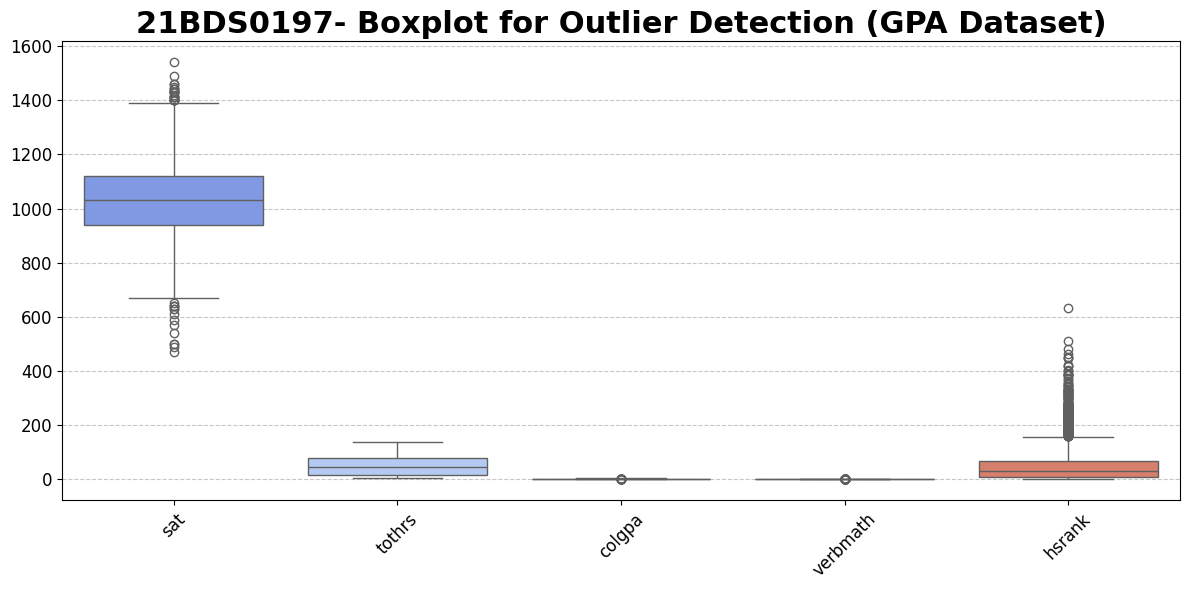

Shape after filtering out outliers: (4137, 13)


In [9]:
# Detect outliers using boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['sat', 'tothrs', 'colgpa', 'verbmath', 'hsrank']], palette='coolwarm')
plt.title('21BDS0197- Boxplot for Outlier Detection (GPA Dataset)', fontsize=22, weight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add grid lines for better readability
plt.tight_layout()
plt.show()

# Filter out outliers based on a threshold (example: filtering 'sat' < threshold)
threshold = 1600  # Example threshold, adjust as necessary
df_filtered = df[df['sat'] < threshold]
print(f"Shape after filtering out outliers: {df_filtered.shape}")


## **Step 3: Univariate Analysis**

###**3.1 Histogram**

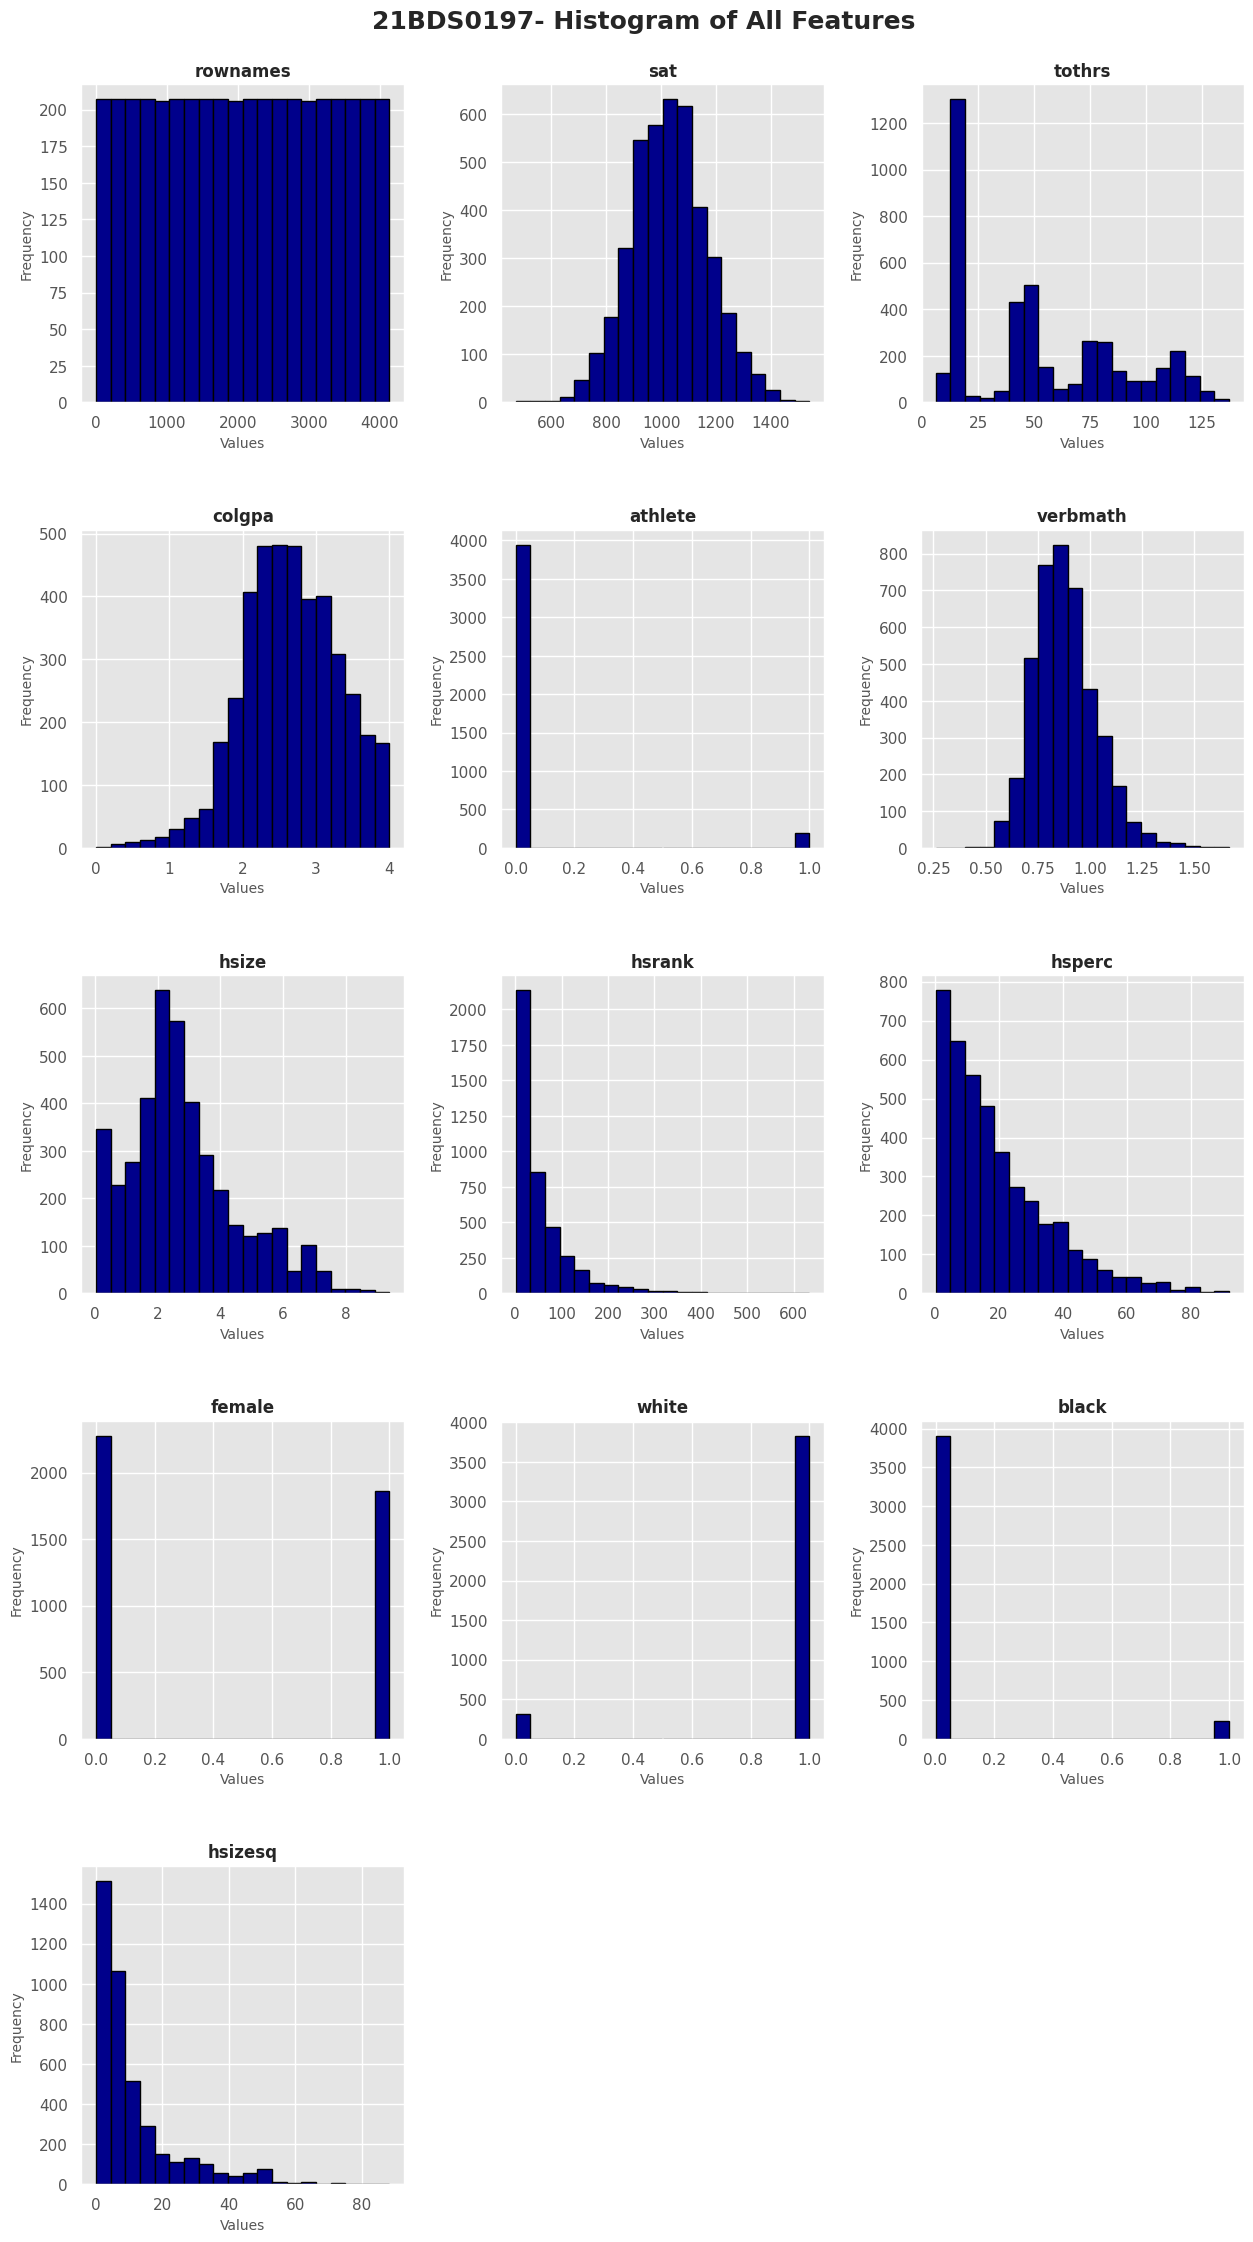

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and palette
sns.set(style="whitegrid")
plt.style.use('ggplot')

color = '#00008B'

# Select only numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Calculate number of rows needed based on the number of features
num_features = len(df_numeric.columns)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each feature's histogram
for i, column in enumerate(df_numeric.columns):
    ax = axes[i]
    df_numeric[column].plot(kind='hist', ax=ax, bins=20, color=color, edgecolor='black', linewidth=1.0)
    ax.set_title(column, fontsize=12, weight='bold')
    ax.set_xlabel('Values', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)

# Remove any unused subplots (if the grid is larger than the number of plots)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('21BDS0197- Histogram of All Features', fontsize=18, weight='bold')
plt.subplots_adjust(top=0.95, hspace=0.4, wspace=0.3)
plt.show()


###**3.2 Boxplot of All Features**

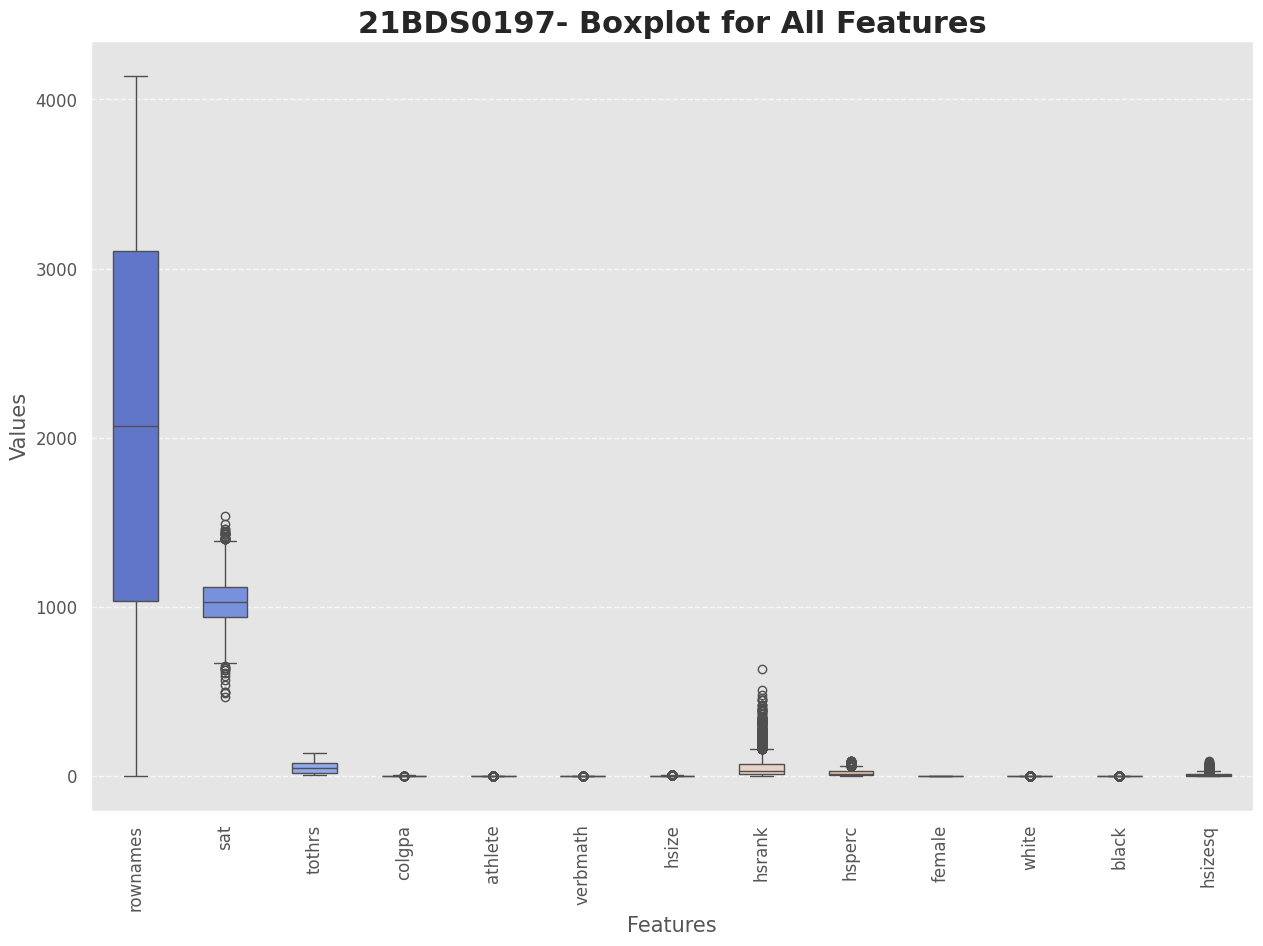

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and palette
sns.set(style="whitegrid")
plt.style.use('ggplot')

# Select only numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Define a color palette with diverse colors for clarity
palette = sns.color_palette("coolwarm", n_colors=len(df_numeric.columns))

# Create the boxplot
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_numeric, palette=palette, width=0.5)

# Enhance plot aesthetics
plt.title('21BDS0197- Boxplot for All Features', fontsize=22, weight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Values', fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)  # grid lines for better readability

# Show plot
plt.show()


###**3.3 Box Plot of Selected Feature**

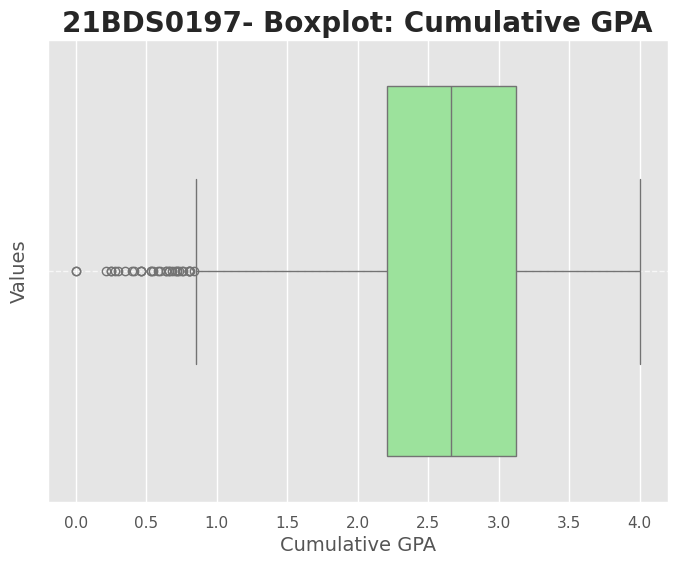

In [12]:
# Boxplot for the 'colgpa' feature (Cumulative GPA)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='colgpa', color='lightgreen')
plt.title('21BDS0197- Boxplot: Cumulative GPA', fontsize=20, weight='bold')
plt.xlabel('Cumulative GPA', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


###**3.4 Violin Plot**

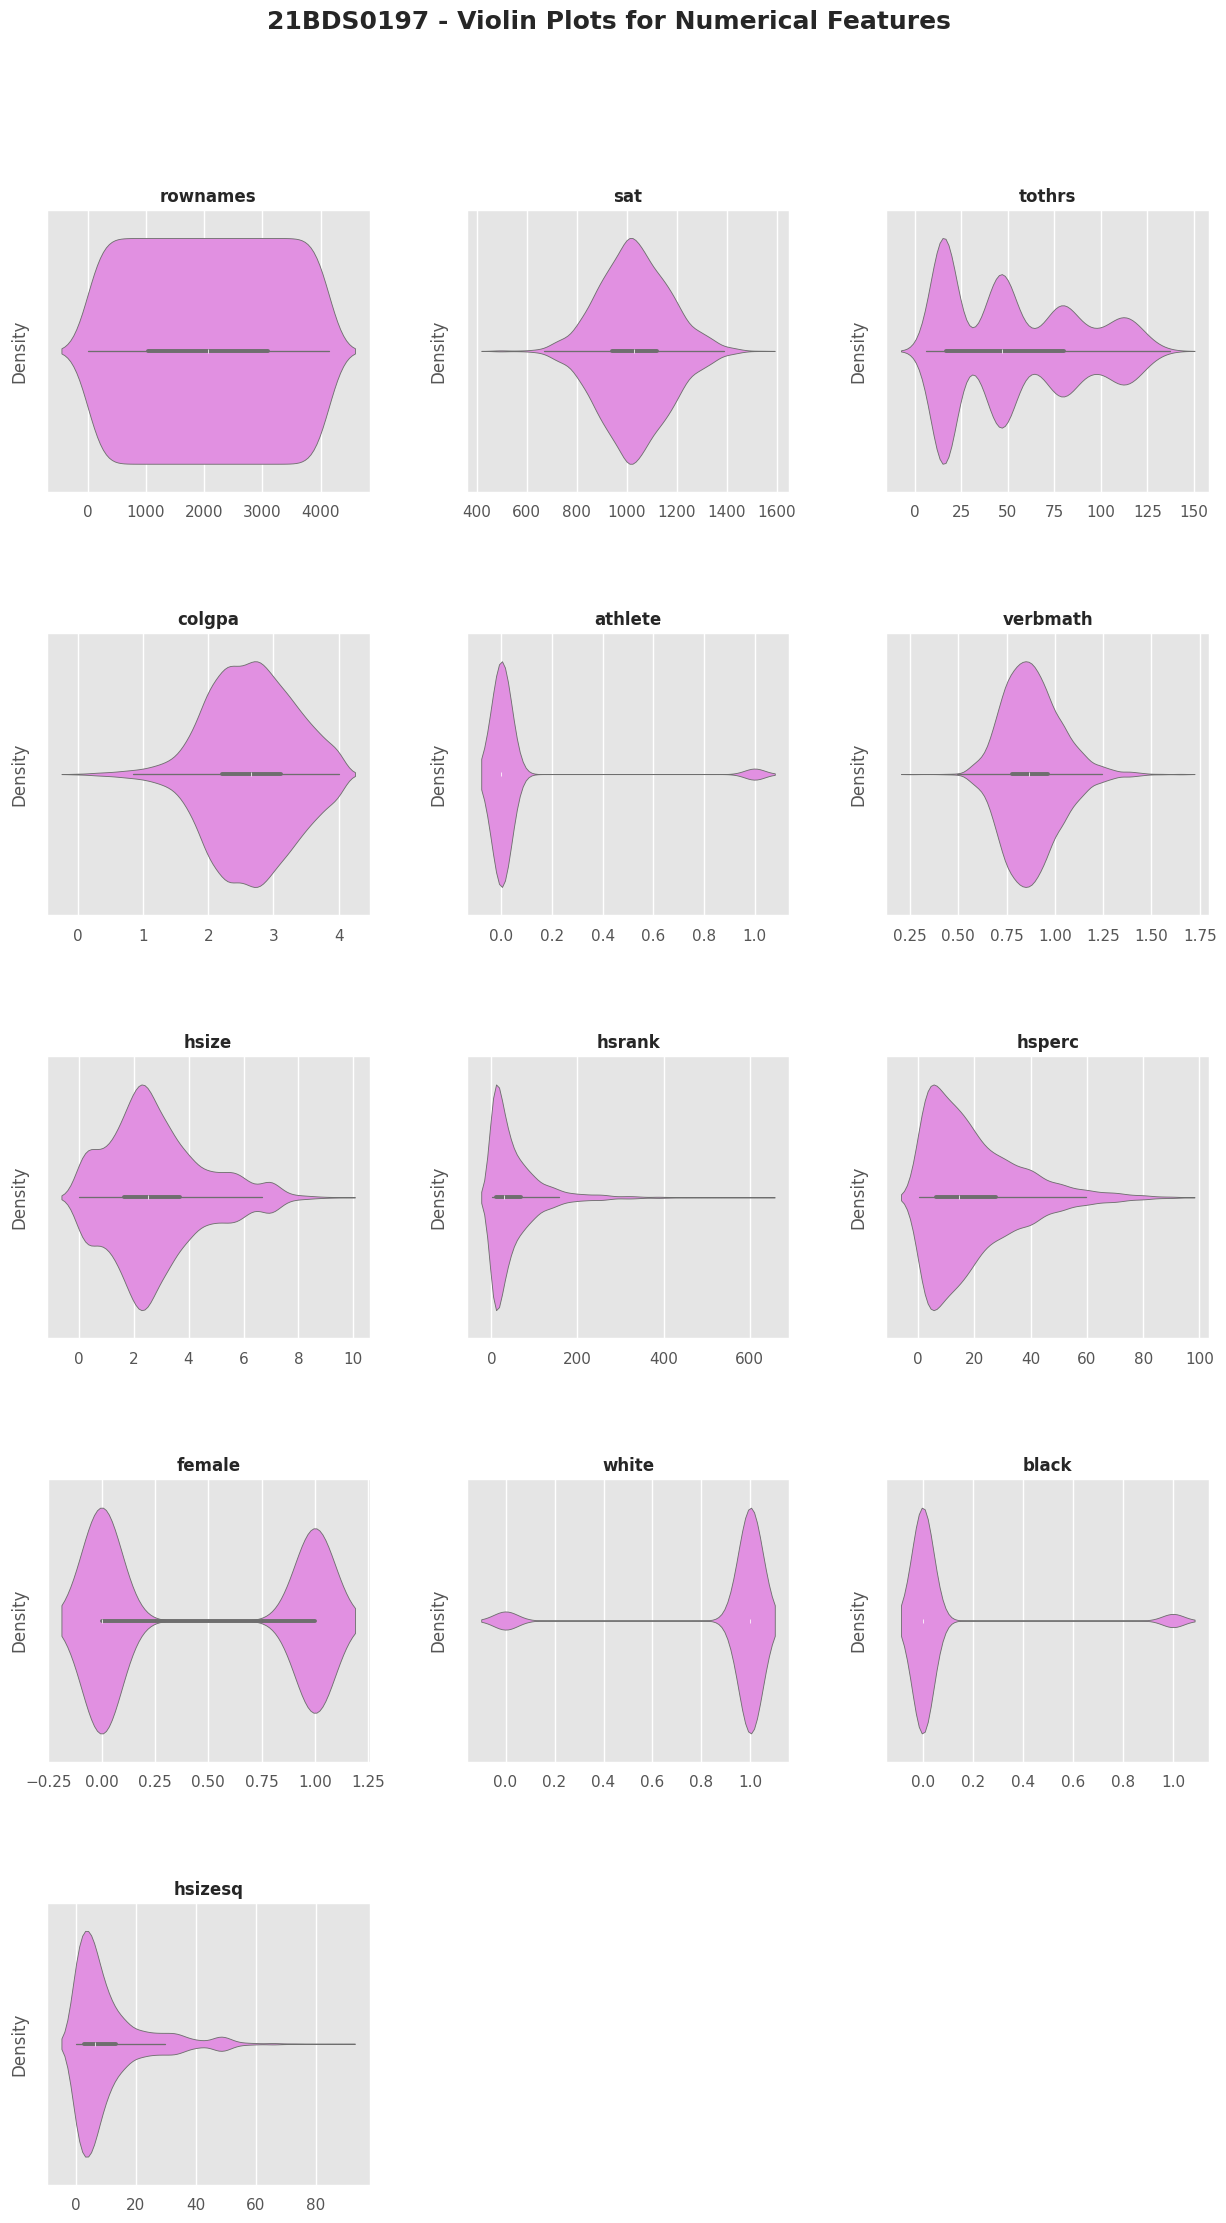

In [13]:
# Select numerical columns
df_numeric = df.select_dtypes(include='number')

# Calculate the number of rows and columns needed for the grid
num_features = len(df_numeric.columns)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each feature's violin plot
for i, column in enumerate(df_numeric.columns):
    sns.violinplot(data=df, x=column, ax=axes[i], color='violet')
    axes[i].set_title(f'{column}', fontsize=12, weight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Density')

# Remove any unused subplots if the grid is larger than the number of plots
if len(df_numeric.columns) < len(axes):
    for j in range(len(df_numeric.columns), len(axes)):
        fig.delaxes(axes[j])

plt.suptitle('21BDS0197 - Violin Plots for Numerical Features', fontsize=18, weight='bold')
plt.subplots_adjust(top=0.9, hspace=0.5, wspace=0.3)
plt.show()

###**3.5 Bar Plot**

<ipython-input-14-a1c2b0686636>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, ax=ax, palette='Blues')
<ipython-input-14-a1c2b0686636>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, ax=ax, palette='Blues')
<ipython-input-14-a1c2b0686636>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, ax=ax, palette='Blues')
<ipython-input-14-a1c2b0686636>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable t

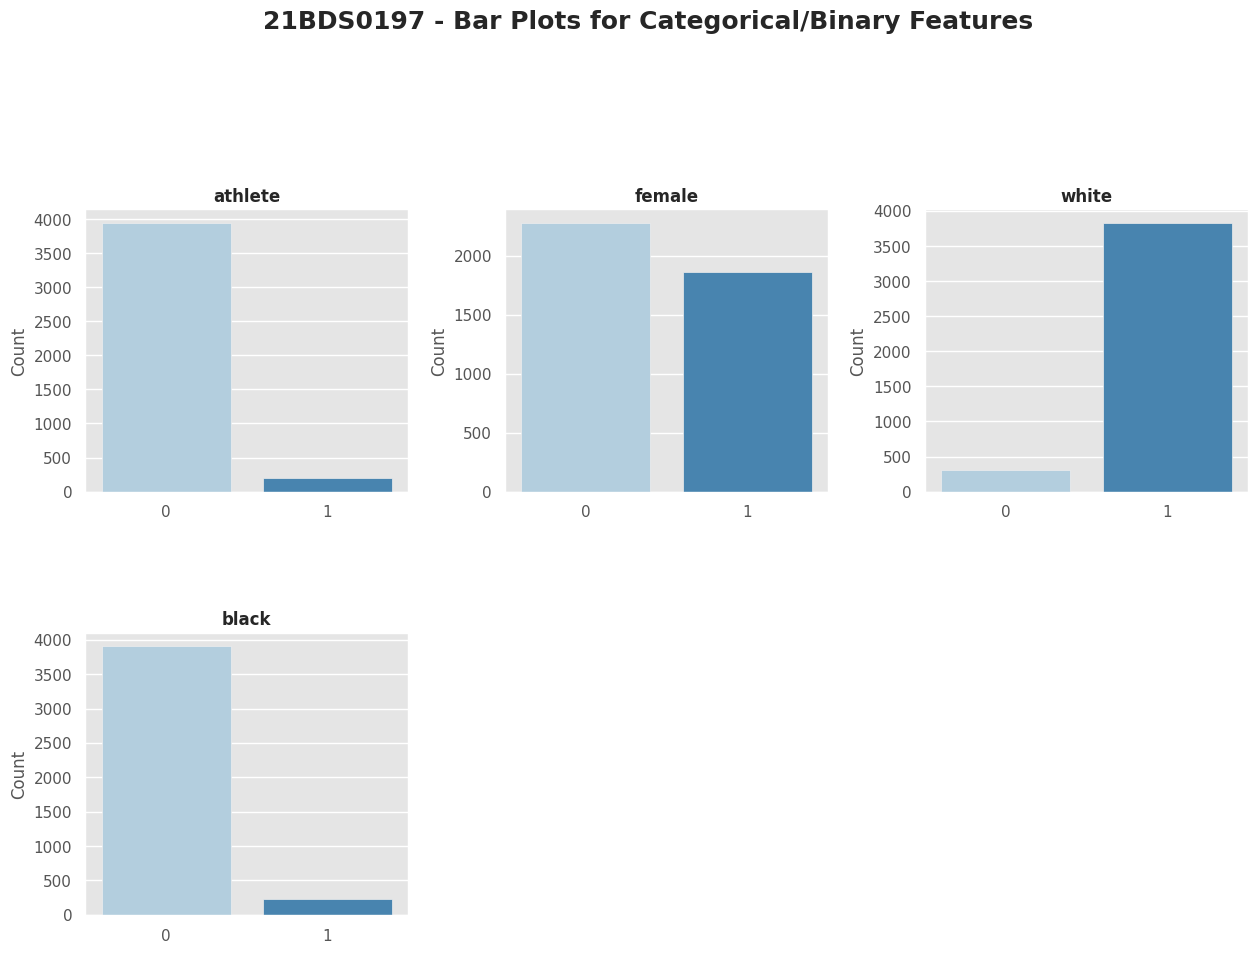

In [14]:
# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Select only categorical/binary columns
df_categorical = df.select_dtypes(include=['object', 'category'])
# Also include binary integer columns (e.g., 0/1 columns)
binary_cols = [col for col in df.columns if df[col].nunique() <= 2 and df[col].dtype in ['int64', 'float64']]
df_categorical = pd.concat([df_categorical, df[binary_cols]], axis=1)

# Plot each feature's bar chart
for i, column in enumerate(df_categorical.columns):
    ax = axes[i]
    sns.countplot(data=df, x=column, ax=ax, palette='Blues')
    ax.set_title(f'{column}', fontsize=12, weight='bold')
    ax.set_xlabel('')
    ax.set_ylabel('Count')

# Remove any unused subplots if the grid is larger than the number of plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('21BDS0197 - Bar Plots for Categorical/Binary Features', fontsize=18, weight='bold')
plt.subplots_adjust(top=0.9, hspace=0.5, wspace=0.3)
plt.show()

###**3.6 Density Plot (KDE)**

<ipython-input-15-ce8f226e9f9d>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['sat'], shade=True, color='orange', alpha=0.7)


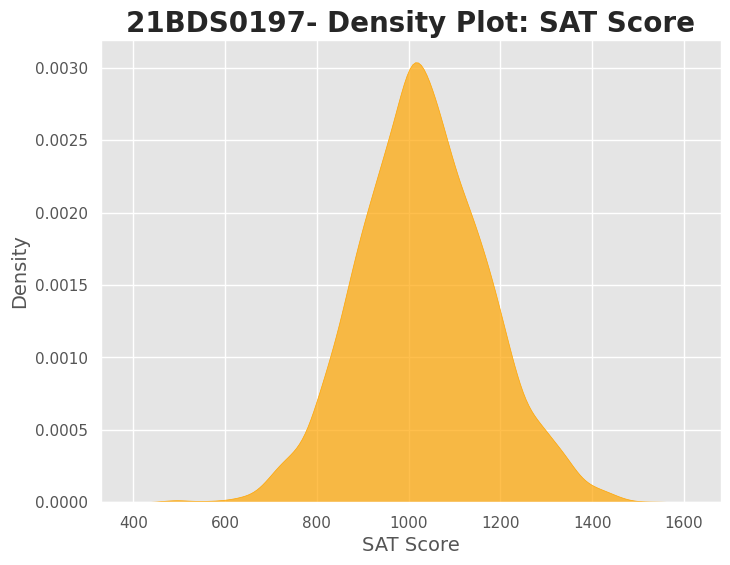

In [15]:
# KDE plot for 'sat' (SAT score)
plt.figure(figsize=(8, 6))
sns.kdeplot(df['sat'], shade=True, color='orange', alpha=0.7)
plt.title('21BDS0197- Density Plot: SAT Score', fontsize=20, weight='bold')
plt.xlabel('SAT Score', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.grid(True)
plt.show()


###**3.7 Pie Chart**

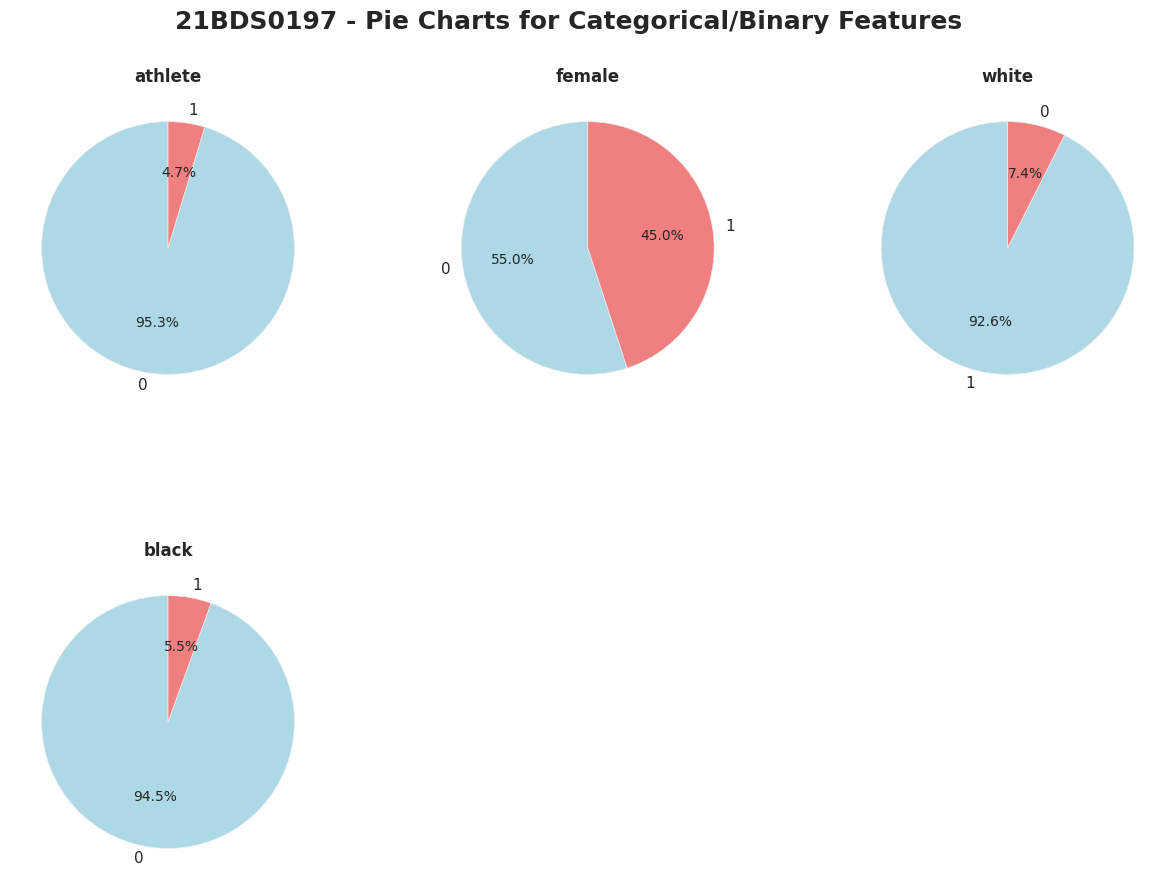

In [16]:
# Define colors for the pie charts
colors = ['lightblue', 'lightcoral', 'lightgreen', 'gold', 'lightpink', 'lightgrey', 'cyan']

# Calculate number of rows needed based on the number of features
num_features = len(df_categorical.columns)
num_cols = 3  # Number of columns in the subplot grid
num_rows = (num_features // num_cols) + (num_features % num_cols > 0)

# Create subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Plot each feature's pie chart
for i, column in enumerate(df_categorical.columns):
    ax = axes[i]
    counts = df_categorical[column].value_counts()
    labels = counts.index
    ax.pie(counts, labels=labels, colors=colors[:len(counts)], autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{column}', fontsize=12, weight='bold')

# Remove any unused subplots if the grid is larger than the number of plots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('21BDS0197 - Pie Charts for Categorical/Binary Features', fontsize=18, weight='bold')
plt.subplots_adjust(top=0.9, hspace=0.5, wspace=0.3)
plt.show()

## **Step 4: Bivariate Analysis**

###**4.1 Contingency Table**

In [17]:
# Create contingency table for athlete and female
contingency_table = pd.crosstab(df['athlete'], df['female'])
print(contingency_table)


female      0     1
athlete            
0        2128  1815
1         149    45


###**4.2 Categorical vs. Categorical Analysis**

####**4.2.1 Stacked Bar Chart**

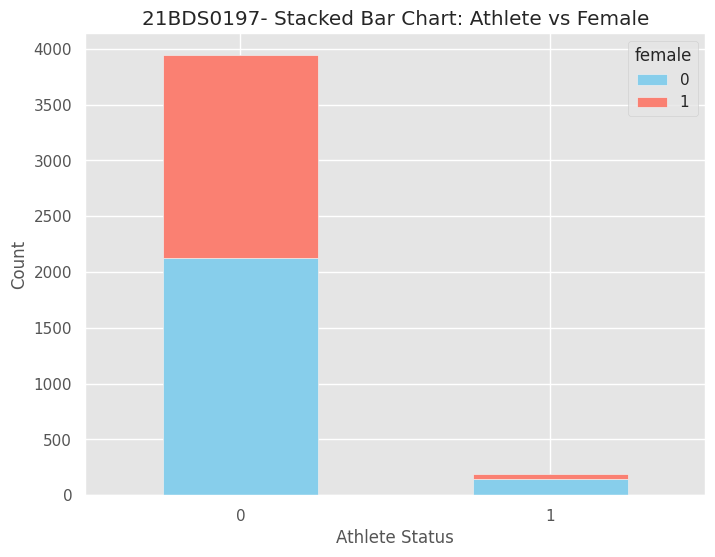

In [18]:
# Stacked Bar Chart
contingency_table.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(8, 6))
plt.title('21BDS0197- Stacked Bar Chart: Athlete vs Female')
plt.xlabel('Athlete Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


####**4.2.2 Stacked Bar Plot with Seaborn**

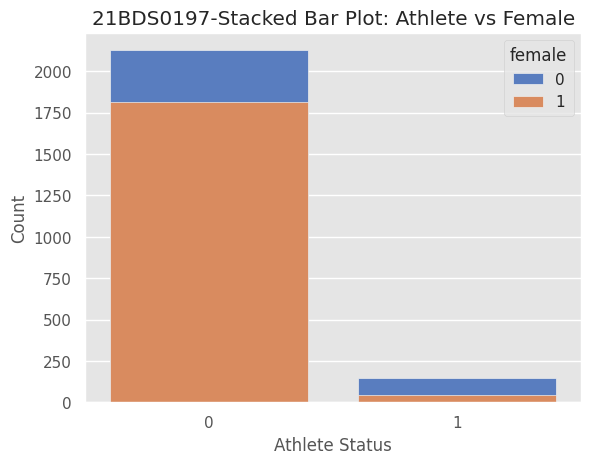

In [19]:
# Stacked Bar Plot with Seaborn
sns.countplot(data=df, x='athlete', hue='female', palette='muted', dodge=False)
plt.title('21BDS0197-Stacked Bar Plot: Athlete vs Female')
plt.xlabel('Athlete Status')
plt.ylabel('Count')
plt.show()


####**4.2.3 Grouped Bar Plot**

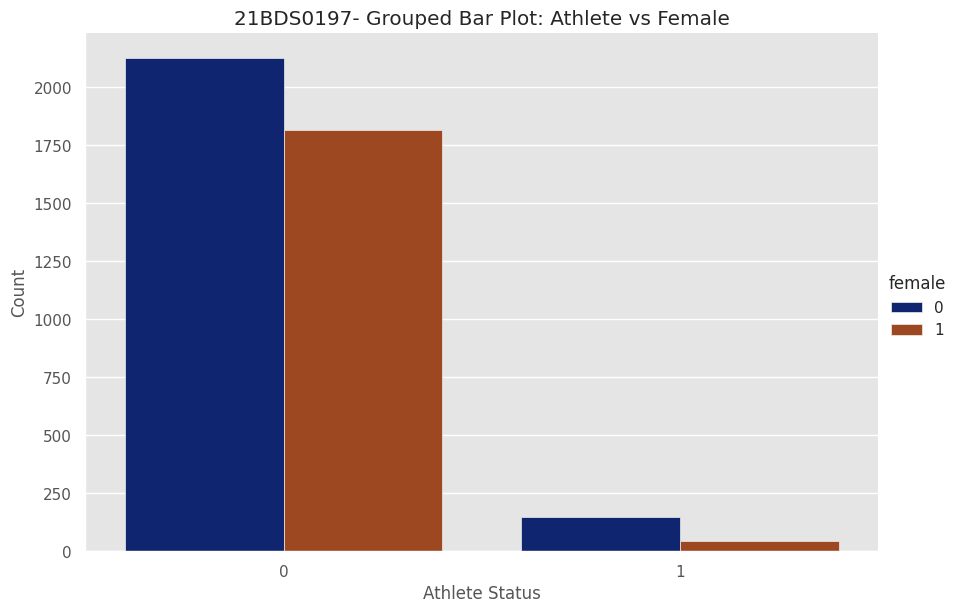

In [20]:
# Grouped Bar Plot
sns.catplot(data=df, x='athlete', hue='female', kind='count', palette='dark', height=6, aspect=1.5)
plt.title('21BDS0197- Grouped Bar Plot: Athlete vs Female')
plt.xlabel('Athlete Status')
plt.ylabel('Count')
plt.show()


####**4.2.4 3D Bar Plot**

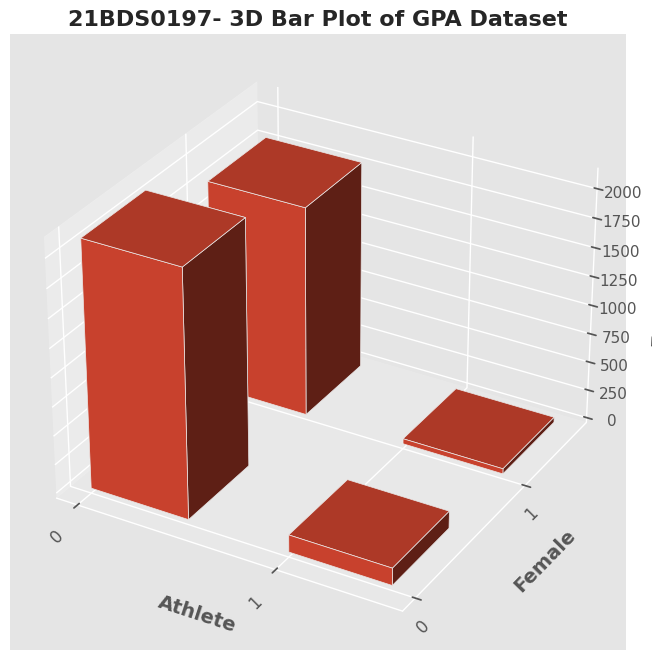

In [21]:
# Create a contingency table
categorical_column1 = 'athlete'  # Example categorical variable
categorical_column2 = 'female'  # Example categorical variable
contingency_table = pd.crosstab(df[categorical_column1], df[categorical_column2])

# Create the figure and 3D axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Prepare the data for 3D bar plot
x_pos = np.arange(len(contingency_table.index))  # Number of categories on x-axis
y_pos = np.arange(len(contingency_table.columns))  # Number of categories on y-axis
z_pos = np.zeros((len(contingency_table.index), len(contingency_table.columns)))  # Base position for bars

# Bar heights
z_height = contingency_table.values.flatten()  # Flattened values for bar heights

# Width and depth for the bars
dx = 0.5  # Width of the bars
dy = 0.5  # Depth of the bars
dz = z_height  # Height of the bars

# Create the meshgrid for x and y positions
x_pos, y_pos = np.meshgrid(x_pos, y_pos, indexing='ij')

# Create the bars
ax.bar3d(x_pos.flatten(), y_pos.flatten(), z_pos.flatten(), dx, dy, dz, shade=True)

# Set axis labels and title with improved font size
ax.set_xlabel(categorical_column1.capitalize(), fontsize=14, fontweight='bold', labelpad=10)
ax.set_ylabel(categorical_column2.capitalize(), fontsize=14, fontweight='bold', labelpad=10)
ax.set_zlabel('Frequency', fontsize=14, fontweight='bold', labelpad=10)
ax.set_title('21BDS0197- 3D Bar Plot of GPA Dataset', fontsize=16, fontweight='bold')

# Rotate the x and y axis labels for better visibility
ax.set_xticks(np.arange(len(contingency_table.index)))
ax.set_xticklabels(contingency_table.index, rotation=45, ha='right', fontsize=12)
ax.set_yticks(np.arange(len(contingency_table.columns)))
ax.set_yticklabels(contingency_table.columns, rotation=45, ha='right', fontsize=12)

plt.show()

###**4.3 Categorical vs. Quantitative Analysis**

####**4.3.1 Bar Chart**

<ipython-input-22-a0624efe8d1a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='athlete', y='colgpa', palette='pastel')


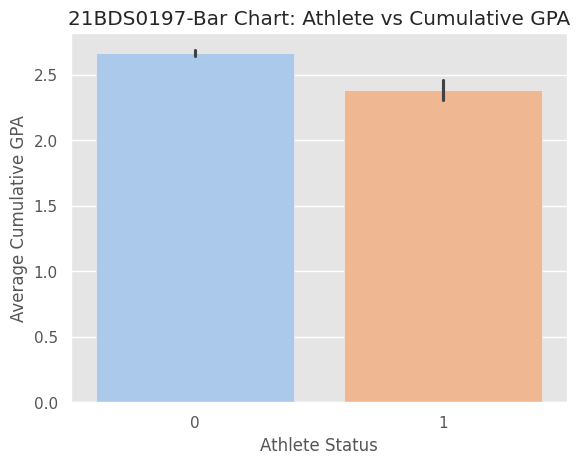

In [22]:
# Bar Chart: Categorical vs Quantitative (athlete vs colgpa)
sns.barplot(data=df, x='athlete', y='colgpa', palette='pastel')
plt.title('21BDS0197-Bar Chart: Athlete vs Cumulative GPA')
plt.xlabel('Athlete Status')
plt.ylabel('Average Cumulative GPA')
plt.show()


####**4.3.2 Density Plot**

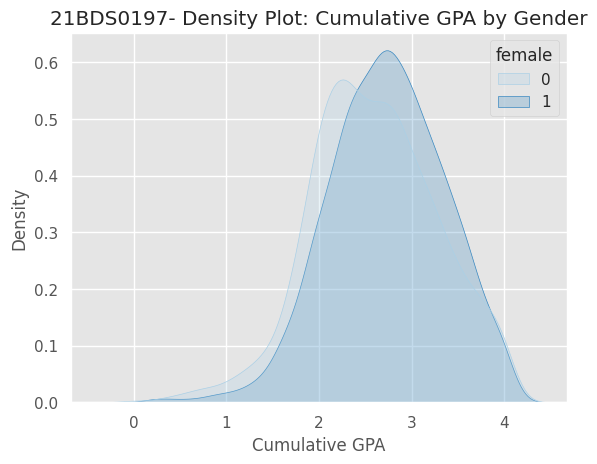

In [23]:
# Density Plot: Categorical vs Quantitative (female vs colgpa)
sns.kdeplot(data=df, x='colgpa', hue='female', fill=True, common_norm=False, palette='Blues')
plt.title('21BDS0197- Density Plot: Cumulative GPA by Gender')
plt.xlabel('Cumulative GPA')
plt.ylabel('Density')
plt.show()


####**4.3.3 Box Plot**

<ipython-input-24-e7c0ebff4880>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='athlete', y='tothrs', palette='Set2')


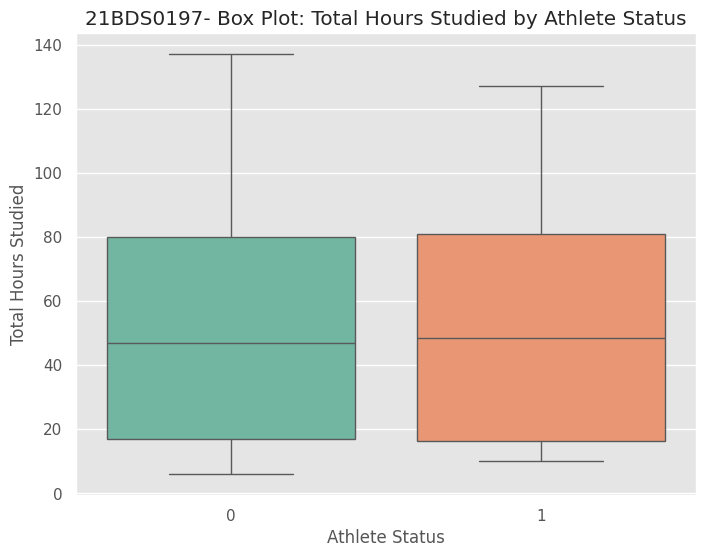

In [24]:
# Box Plot: Categorical vs Quantitative (athlete vs tothrs)
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='athlete', y='tothrs', palette='Set2')
plt.title('21BDS0197- Box Plot: Total Hours Studied by Athlete Status')
plt.xlabel('Athlete Status')
plt.ylabel('Total Hours Studied')
plt.show()


####**4.3.4 Violin Plot**

<ipython-input-25-b1a93abfaed8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='female', y='colgpa', palette='muted')


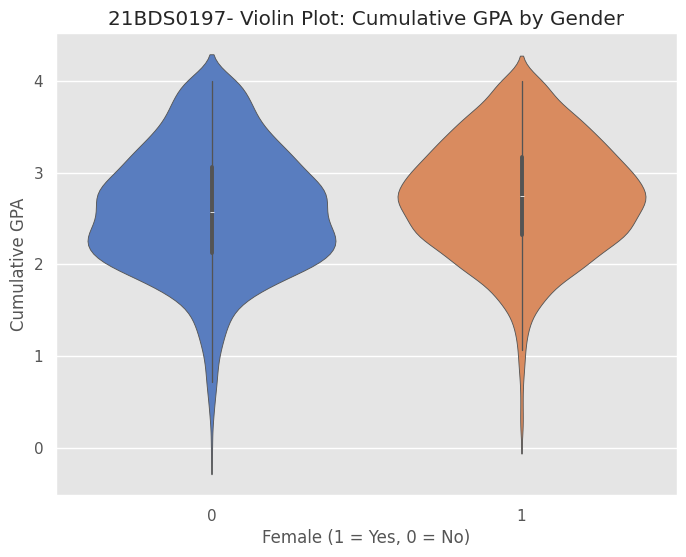

In [25]:
# Violin Plot: Categorical vs Quantitative (female vs colgpa)
plt.figure(figsize=(8, 6))
sns.violinplot(data=df, x='female', y='colgpa', palette='muted')
plt.title('21BDS0197- Violin Plot: Cumulative GPA by Gender')
plt.xlabel('Female (1 = Yes, 0 = No)')
plt.ylabel('Cumulative GPA')
plt.show()


###**4.4 Quantitative vs. Quantitative Analysis**

####**4.4.1 Line Plot**

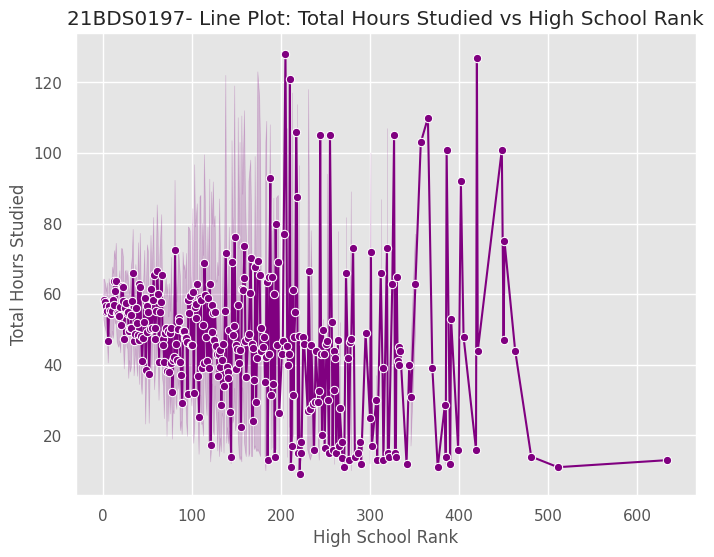

In [26]:
# Line Plot: Quantitative vs Quantitative (hsrank vs tothrs)
plt.figure(figsize=(8, 6))
sns.lineplot(data=df, x='hsrank', y='tothrs', marker='o', color='purple')
plt.title('21BDS0197- Line Plot: Total Hours Studied vs High School Rank')
plt.xlabel('High School Rank')
plt.ylabel('Total Hours Studied')
plt.grid(True)
plt.show()


####**4.4.2 Correlation Heatmap**

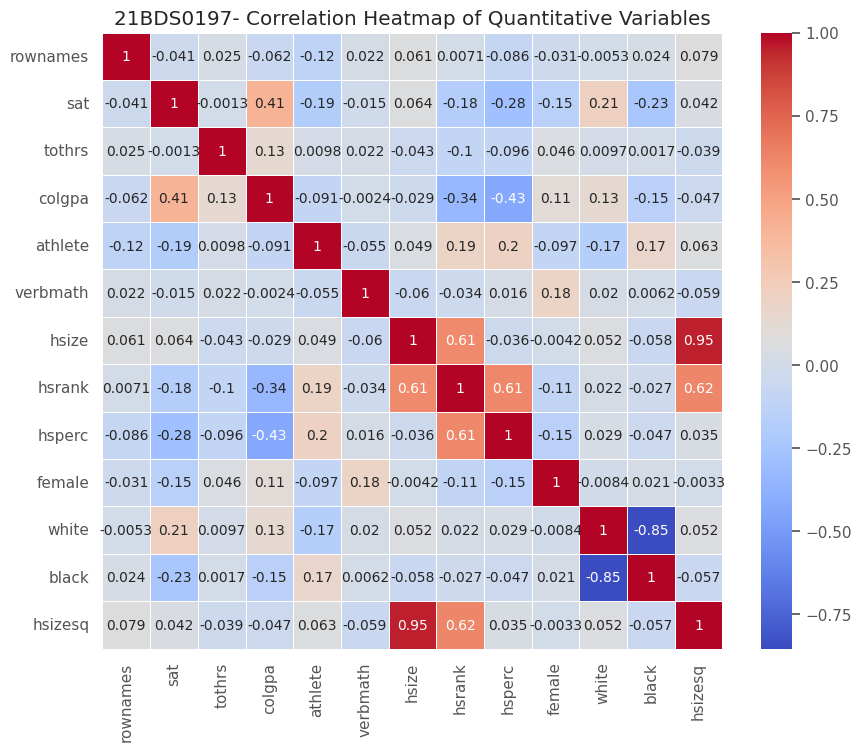

In [27]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('21BDS0197- Correlation Heatmap of Quantitative Variables')
plt.show()


####**4.4.3 Scatter Plot**

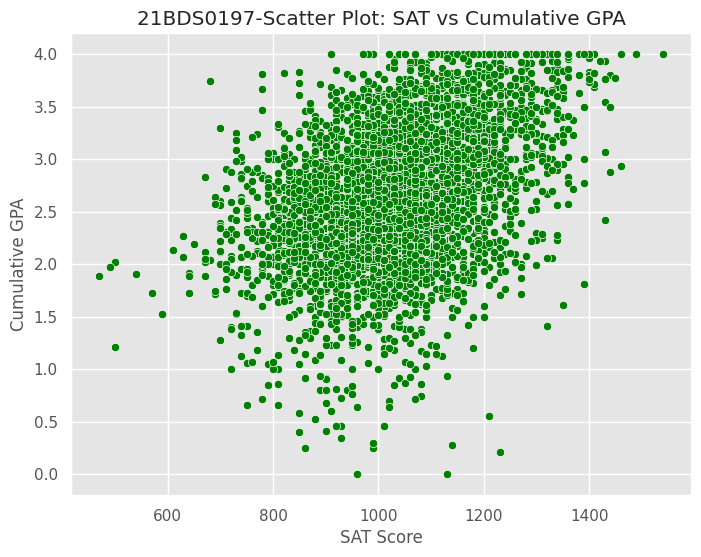

In [28]:
# Scatter Plot: Quantitative vs Quantitative (sat vs colgpa)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='sat', y='colgpa', color='green')
plt.title('21BDS0197-Scatter Plot: SAT vs Cumulative GPA')
plt.xlabel('SAT Score')
plt.ylabel('Cumulative GPA')
plt.grid(True)
plt.show()


## **Step 5: Multivariate Analysis**

###**5.1 Contingency Data Sets**

In [29]:
# Three-way Contingency Table: Athlete, Female, and White
contingency_table_afw = pd.crosstab([df['athlete'], df['female']], df['white'], margins=True, margins_name="Total")
print("\nThree-way Contingency Table: Athlete, Female vs White")
print(contingency_table_afw)


Three-way Contingency Table: Athlete, Female vs White
white             0     1  Total
athlete female                  
0       0       128  2000   2128
        1       127  1688   1815
1       0        37   112    149
        1        16    29     45
Total           308  3829   4137


###**5.2 Scatter Plot with Color as a Third Variable**

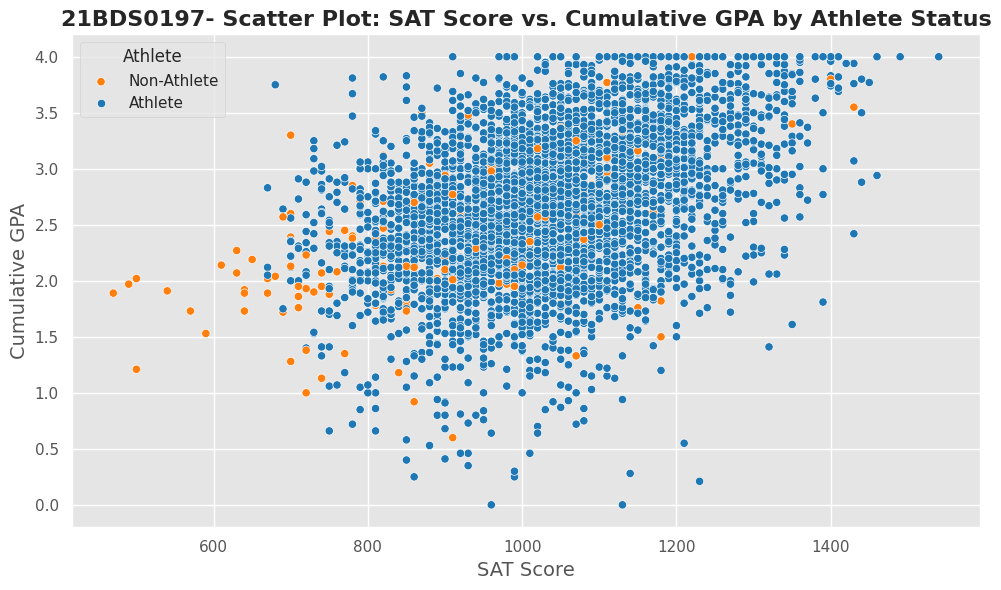

In [30]:
# Scatter Plot with Color as a Third Variable
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sat', y='colgpa', hue='athlete', palette=["#1f77b4", "#ff7f0e"])
plt.title("21BDS0197- Scatter Plot: SAT Score vs. Cumulative GPA by Athlete Status", fontsize=16, weight='bold')
plt.xlabel("SAT Score", fontsize=14)
plt.ylabel("Cumulative GPA", fontsize=14)
plt.legend(title='Athlete', labels=['Non-Athlete', 'Athlete'])
plt.grid(True)
plt.tight_layout()
plt.show()

###**5.3 Scatter Plot with Color and Size as Variables**

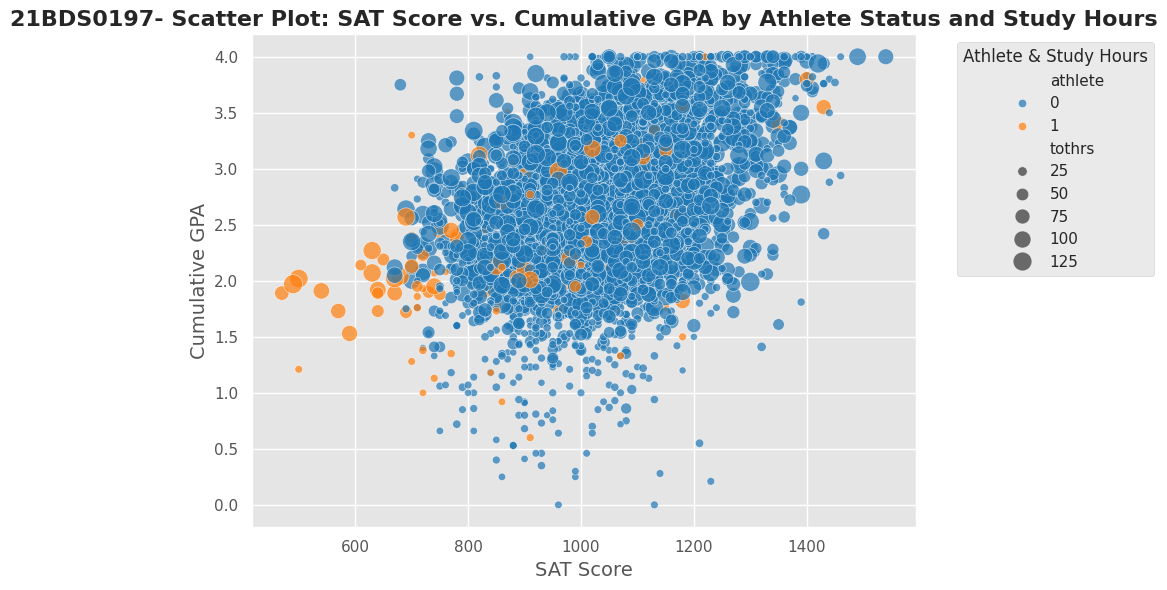

In [31]:
# Scatter Plot with Color and Size as Variables
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sat', y='colgpa', hue='athlete', size='tothrs', sizes=(20, 200), alpha=0.7, palette=["#1f77b4", "#ff7f0e"])
plt.title("21BDS0197- Scatter Plot: SAT Score vs. Cumulative GPA by Athlete Status and Study Hours", fontsize=16, weight='bold')
plt.xlabel("SAT Score", fontsize=14)
plt.ylabel("Cumulative GPA", fontsize=14)
plt.legend(title='Athlete & Study Hours', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


###**5.4 Bubble Plot**

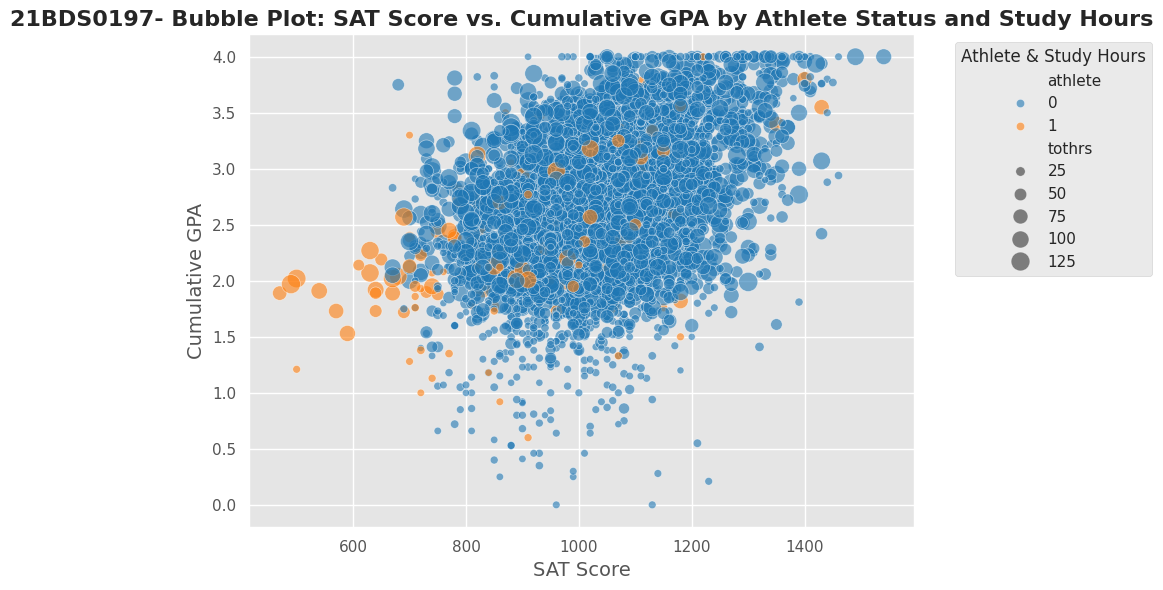

In [32]:
# Bubble Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='sat', y='colgpa', hue='athlete', size='tothrs', sizes=(20, 200), alpha=0.6, palette=["#1f77b4", "#ff7f0e"])
plt.title("21BDS0197- Bubble Plot: SAT Score vs. Cumulative GPA by Athlete Status and Study Hours", fontsize=16, weight='bold')
plt.xlabel("SAT Score", fontsize=14)
plt.ylabel("Cumulative GPA", fontsize=14)
plt.legend(title='Athlete & Study Hours', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


###**5.5 Faceted Histogram**

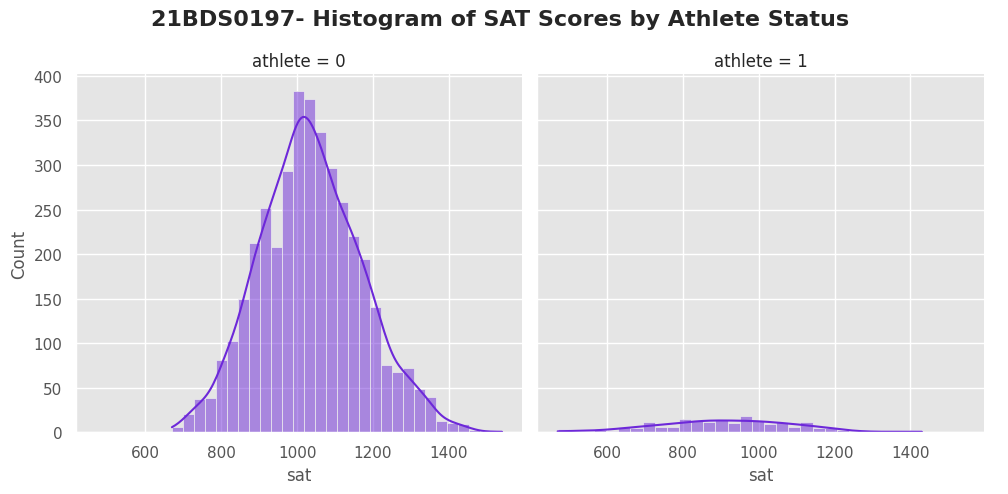

In [33]:
# Faceted Histogram
g = sns.FacetGrid(df, col='athlete', height=5, aspect=1)
g.map(sns.histplot, 'sat', bins=30, color="#6D28D9", kde=True)
g.add_legend()
plt.subplots_adjust(top=0.85)
g.fig.suptitle("21BDS0197- Histogram of SAT Scores by Athlete Status", fontsize=16, weight='bold')
plt.show()

###**5.6 Pairplot**

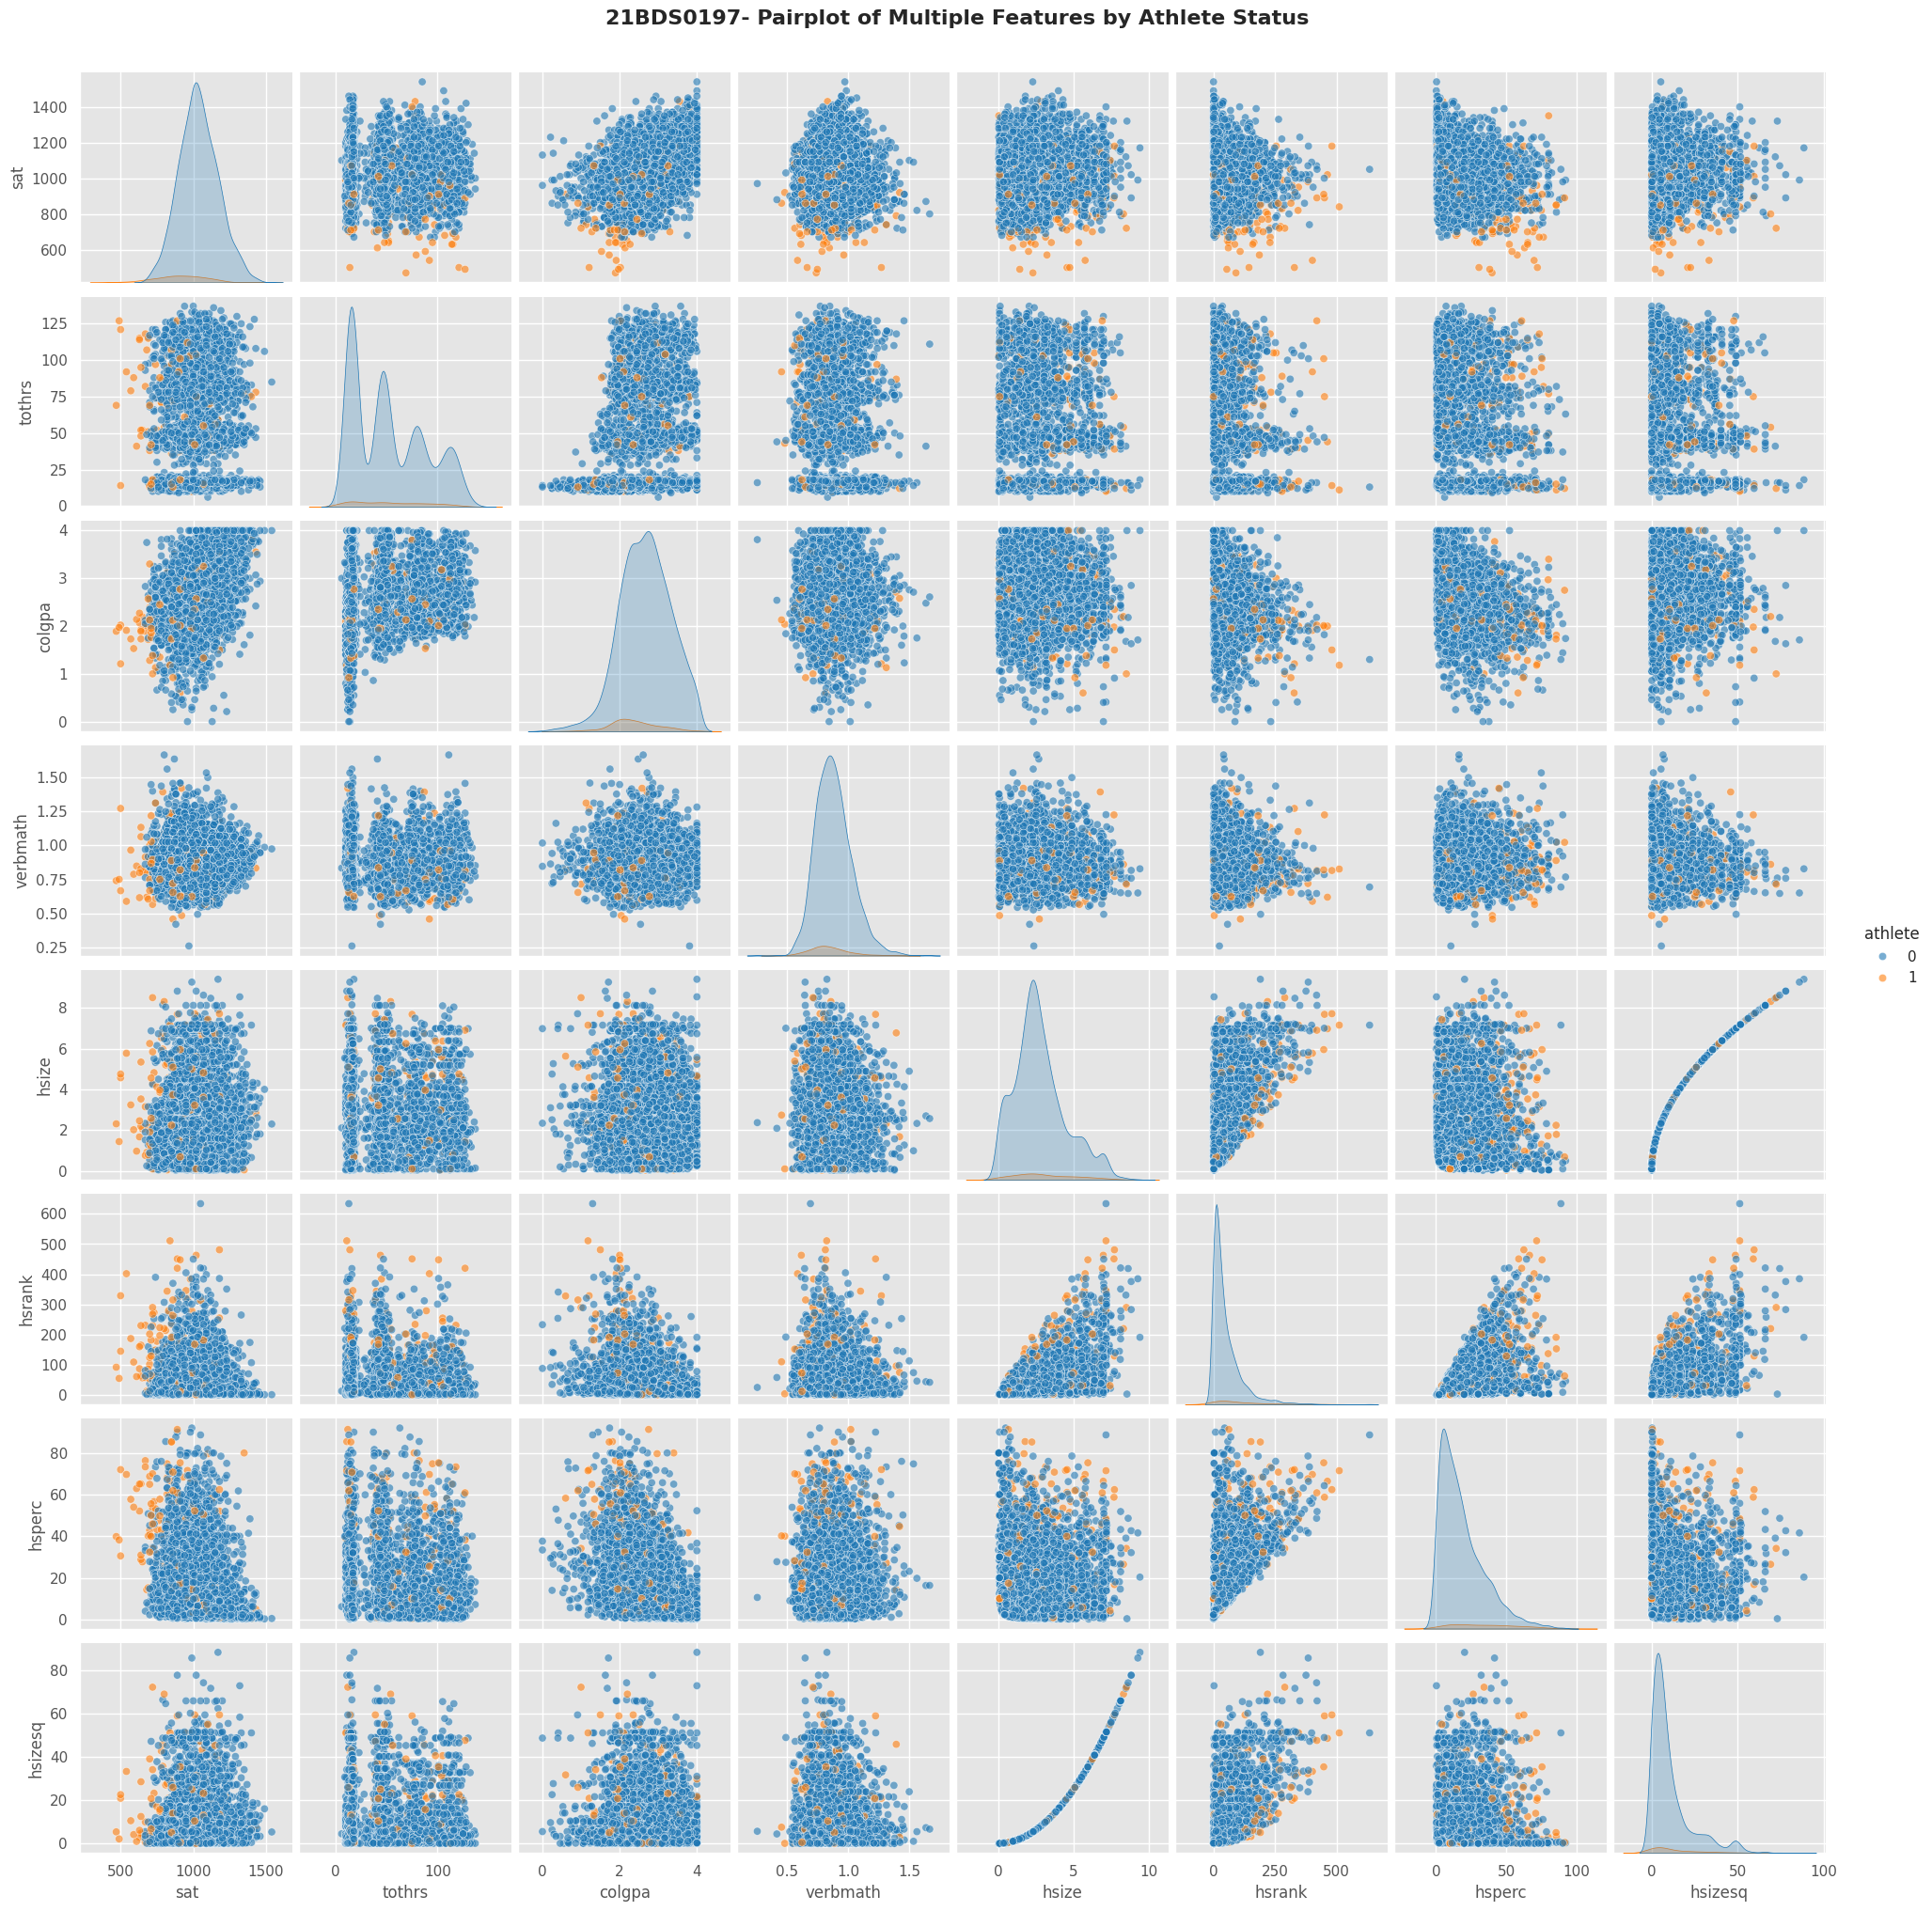

In [34]:
# Pairplot with Hue as 'athlete'
sns.pairplot(
    df,
    vars=['sat', 'tothrs', 'colgpa', 'verbmath', 'hsize', 'hsrank', 'hsperc', 'hsizesq'],
    hue='athlete',
    palette=["#1f77b4", "#ff7f0e"],
    diag_kind='kde',
    plot_kws={'alpha': 0.6}
)
plt.suptitle('21BDS0197- Pairplot of Multiple Features by Athlete Status', y=1.02, fontsize=16, weight='bold')
plt.show()


###**5.7 Correlation Heatmap**

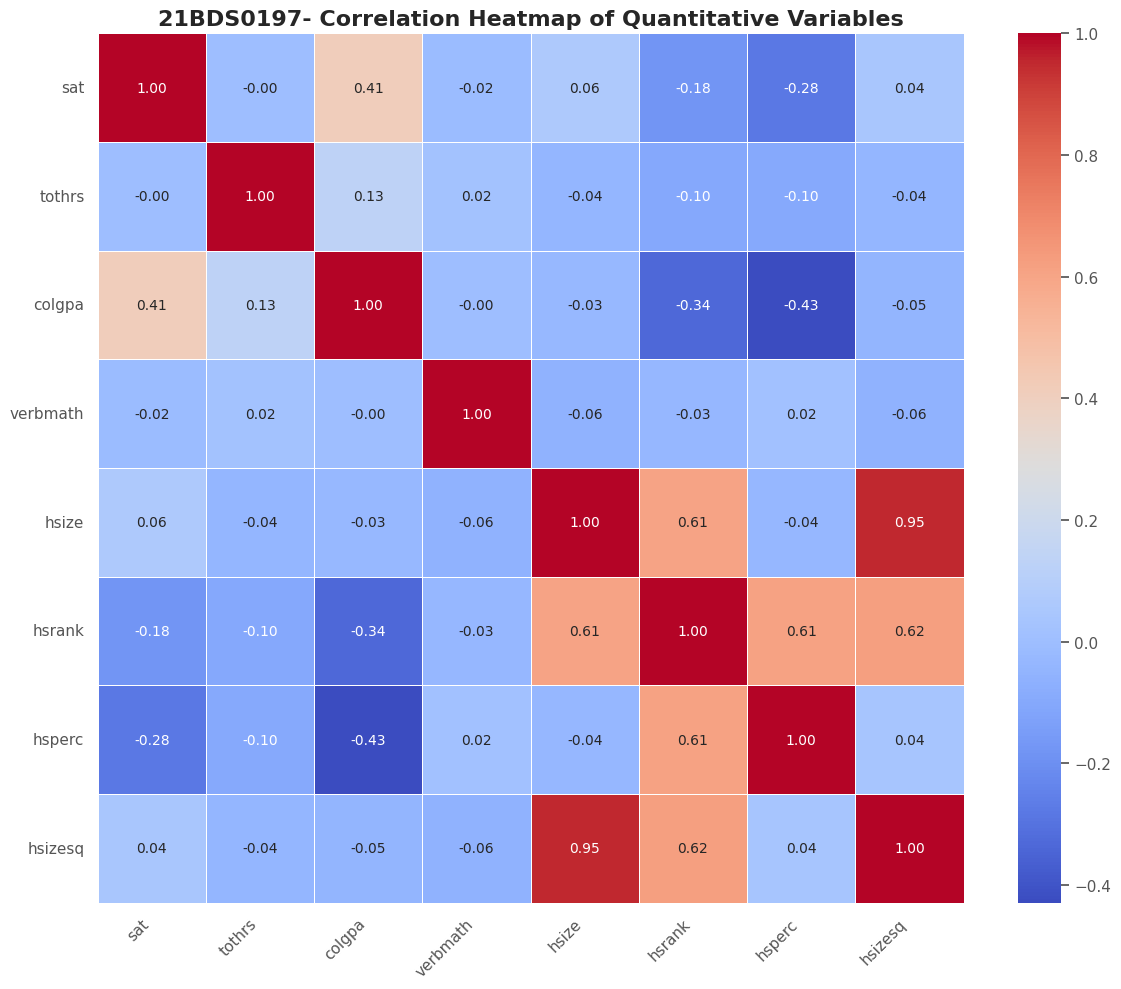

In [35]:
# Heatmap with Annotations
plt.figure(figsize=(12, 10))
corr_matrix = df[['sat', 'tothrs', 'colgpa', 'verbmath', 'hsize', 'hsrank', 'hsperc', 'hsizesq']].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('21BDS0197- Correlation Heatmap of Quantitative Variables', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

###**5.8 Sunray Plot (Radar Chart)**

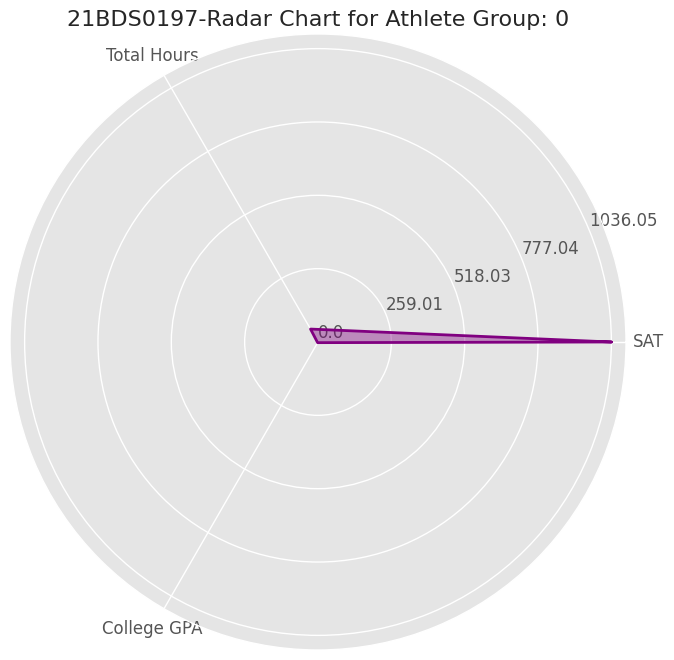

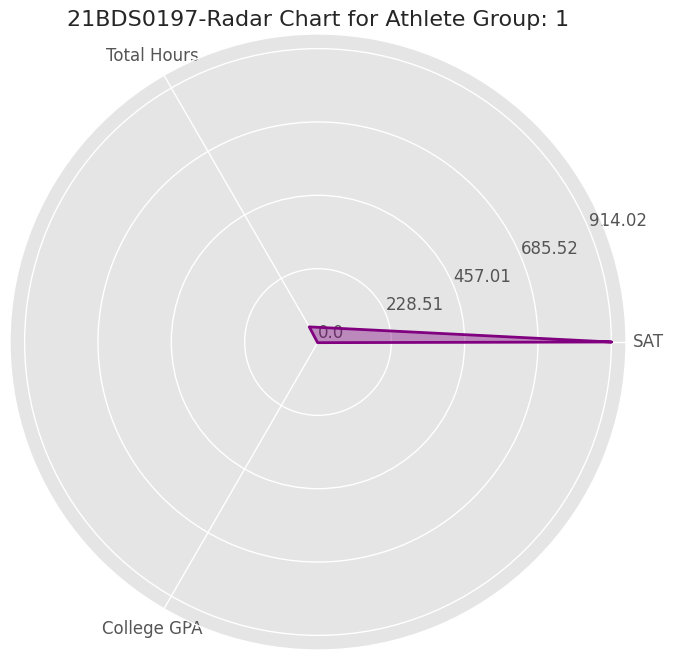

In [36]:
# Function to create radar chart
def create_radar_chart(data, labels, title):
    # Number of variables
    num_vars = len(labels)

    # Compute angle for each axis
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The plot is a circle, so we need to "complete the loop" and append the start to the end
    data = np.concatenate((data, [data[0]]))
    angles += angles[:1]

    # Create the radar chart
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    # Set the color and transparency
    ax.fill(angles, data, color='purple', alpha=0.4)
    ax.plot(angles, data, color='purple', linewidth=2)  # Add line to outline

    # Customize the radial grid and labels
    ax.set_yticks(np.linspace(0, max(data), 5))
    ax.set_yticklabels([f"{round(i, 2)}" for i in np.linspace(0, max(data), 5)], fontsize=12)

    # Add labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels, fontsize=12)
    plt.title(title, size=16)

    plt.show()

# Select numerical columns and group by a categorical variable
grouped_data = df.groupby('athlete')[['sat', 'tothrs', 'colgpa']].mean()

# Feature labels
labels = ['SAT', 'Total Hours', 'College GPA']

# Create radar chart for each group in the categorical variable
for category in grouped_data.index:
    create_radar_chart(grouped_data.loc[category].values, labels, f'21BDS0197-Radar Chart for Athlete Group: {category}')


#**Module 2 Implementation:**

##**Step 6: Working with DataFrames**

###**6.1 Merging Data**

In [37]:
# Create a secondary DataFrame to merge based on 'rownames'
df_merge = df[['rownames', 'sat']]

# Merge the original DataFrame with the new DataFrame on 'rownames'
df_merged = pd.merge(df, df_merge, on='rownames')

# View the merged DataFrame
df_merged.head()

rownames  sat_x  tothrs  colgpa  athlete  verbmath  hsize  hsrank  \
0         1    920      43    2.04        1   0.48387   0.10       4   
1         2   1170      18    4.00        0   0.82813   9.40     191   
2         3    810      14    1.78        1   0.88372   1.19      42   
3         4    940      40    2.42        0   0.80769   5.71     252   
4         5   1180      18    2.61        0   0.73529   2.14      86   

      hsperc  female  white  black    hsizesq  sat_y  
0  40.000000       1      0      0   0.010000    920  
1  20.319149       0      1      0  88.360001   1170  
2  35.294117       0      1      0   1.416100    810  
3  44.133099       0      1      0  32.604099    940  
4  40.186916       0      1      0   4.579600   1180

###**6.2 Reshaping with Hierarchical Indexing**


In [38]:
# Set a hierarchical index using 'hsrank' and 'sat'
df.set_index(['hsrank', 'sat'], inplace=True)

# View the DataFrame with the hierarchical index
df.head()

# Reset the index back to the default integer index
df.reset_index(inplace=True)
df.head()

hsrank   sat  rownames  tothrs  colgpa  athlete  verbmath  hsize  \
0       4   920         1      43    2.04        1   0.48387   0.10   
1     191  1170         2      18    4.00        0   0.82813   9.40   
2      42   810         3      14    1.78        1   0.88372   1.19   
3     252   940         4      40    2.42        0   0.80769   5.71   
4      86  1180         5      18    2.61        0   0.73529   2.14   

      hsperc  female  white  black    hsizesq  
0  40.000000       1      0      0   0.010000  
1  20.319149       0      1      0  88.360001  
2  35.294117       0      1      0   1.416100  
3  44.133099       0      1      0  32.604099  
4  40.186916       0      1      0   4.579600

###**6.3 Transformation Techniques**

In [39]:
# Apply log transformation to 'sat' to reduce skewness (adding 1 to avoid log(0))
df['log_sat'] = np.log(df['sat'] + 1)

# View the original and transformed columns
print(df[['sat', 'log_sat']].head())

    sat   log_sat
0   920  6.825460
1  1170  7.065613
2   810  6.698268
3   940  6.846943
4  1180  7.074117


###**6.4 Discretization and Binning**

In [40]:
# Define the bins and labels for discretizing 'hsrank'
bins = [0, 50, 100, 200]
labels = ['Top', 'Middle', 'Low']

# Create a new column 'hsrank_bin' based on the discretization of 'hsrank'
df['hsrank_bin'] = pd.cut(df['hsrank'], bins=bins, labels=labels)

# View the binned column
df[['hsrank', 'hsrank_bin']].tail()

hsrank hsrank_bin
4132      89     Middle
4133       2        Top
4134       1        Top
4135      23        Top
4136      38        Top

In [41]:
df.drop('hsrank_bin', axis=1, inplace=True)

##**Module 3 Implementation:**

##**Step 7: Working with Time Series Data**

###**7.1 Create a Simulated Time Index**

In [42]:
#Since our dataset isn't time-series based, this can be adapted by using a mock column or working with the timestamp for exploratory purposes.
#However, this step can be omitted if not relevant to the current dataset.

In [43]:
# Simulate a time index
df['time'] = pd.Series(range(len(df)))

###**7.2 Check for Missing Values**


In [44]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 hsrank      0
sat         0
rownames    0
tothrs      0
colgpa      0
athlete     0
verbmath    0
hsize       0
hsperc      0
female      0
white       0
black       0
hsizesq     0
log_sat     0
time        0
dtype: int64


###**7.3 Plot the Time Series**

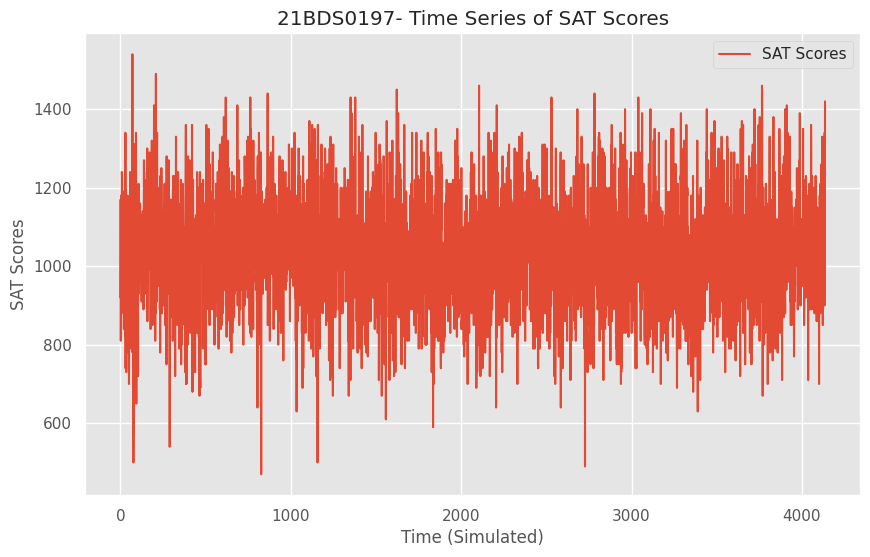

In [45]:
import matplotlib.pyplot as plt

# Plot the time series of 'sat'
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['sat'], label='SAT Scores')
plt.title("21BDS0197- Time Series of SAT Scores")
plt.xlabel("Time (Simulated)")
plt.ylabel("SAT Scores")
plt.legend()
plt.show()


###**7.4 Decompose the Dataset**

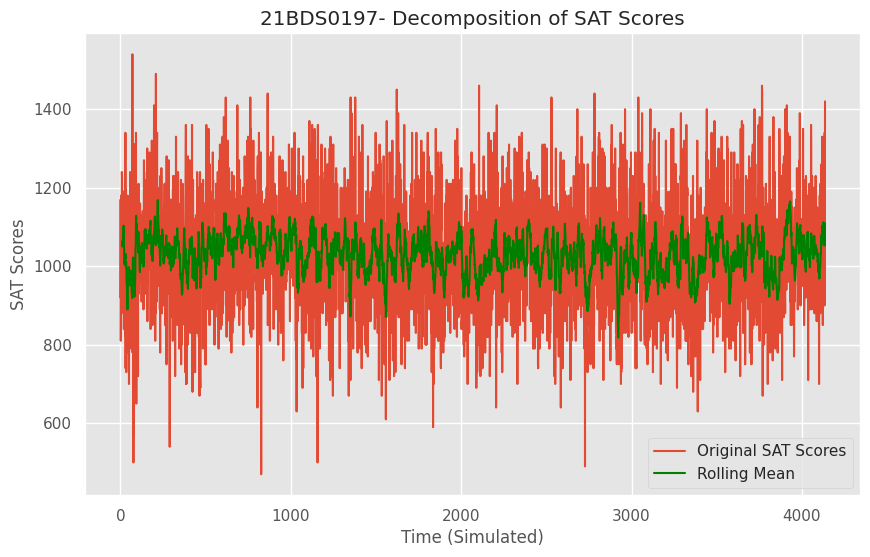

In [46]:
# Calculate rolling mean for 'sat'
df['rolling_mean'] = df['sat'].rolling(window=12).mean()

# Plot original and rolling mean
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['sat'], label='Original SAT Scores')
plt.plot(df['time'], df['rolling_mean'], label='Rolling Mean', color='green')
plt.title("21BDS0197- Decomposition of SAT Scores")
plt.xlabel("Time (Simulated)")
plt.ylabel("SAT Scores")
plt.legend()
plt.show()

In [47]:
df=df.drop('rolling_mean', axis=1)

###**7.5 Make the Dataset Stationary**

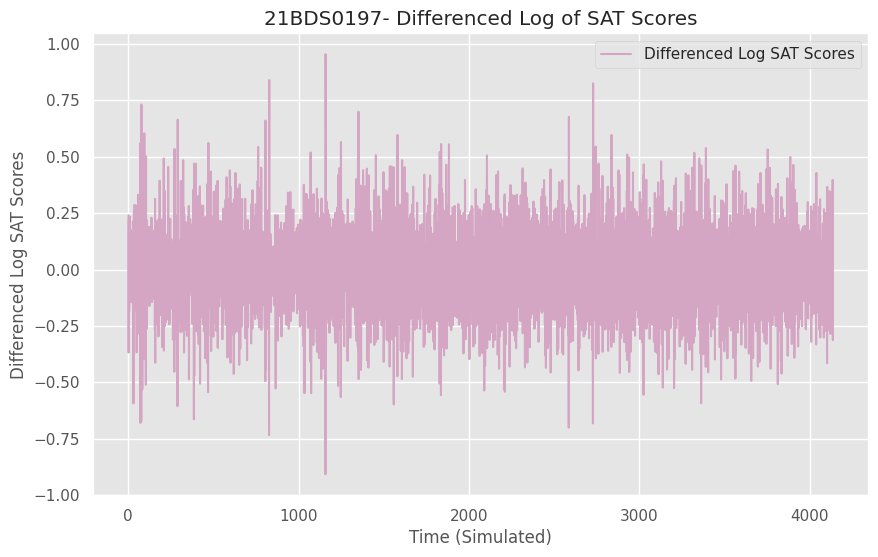

In [48]:
# Differencing to make it stationary
df['diff_log_sat'] = df['log_sat'].diff()

# Plotting the differenced series
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['diff_log_sat'], label='Differenced Log SAT Scores', color="#D5A6C4")
plt.title("21BDS0197- Differenced Log of SAT Scores")
plt.xlabel("Time (Simulated)")
plt.ylabel("Differenced Log SAT Scores")
plt.legend(loc='upper right')
plt.show()

In [49]:
df=df.drop('log_sat', axis=1)

In [66]:
df=df.drop('diff_log_sat',axis=1)

In [68]:
df=df.drop('time', axis=1)

##**Module 4 Implementation:**

##**Step 8: Statistical 1D Analysis**

###**8.1 Measures of Central Tendency:**

####**8.1.1 Mean and Median**

In [50]:
# List of columns to analyze (numerical columns)
columns = ['sat', 'tothrs', 'colgpa', 'verbmath', 'hsize']

# Calculate Mean
mean_values = df[columns].mean()
print("Mean Values:\n", mean_values)

# Calculate Median
median_values = df[columns].median()
print("\nMedian Values:\n", median_values)

# Calculate Quantiles (25%, 50%, 75%)
quantiles = df[columns].quantile([0.25, 0.5, 0.75])
print("\nQuantiles (25%, 50%, 75%):\n", quantiles)

Mean Values:
 sat         1030.331158
tothrs        52.832246
colgpa         2.652686
verbmath       0.880537
hsize          2.799727
dtype: float64

Median Values:
 sat         1030.00000
tothrs        47.00000
colgpa         2.66000
verbmath       0.86667
hsize          2.51000
dtype: float64

Quantiles (25%, 50%, 75%):
          sat  tothrs  colgpa  verbmath  hsize
0.25   940.0    17.0    2.21   0.77586   1.65
0.50  1030.0    47.0    2.66   0.86667   2.51
0.75  1120.0    80.0    3.12   0.96491   3.68


###**8.2 Measures of Dispersion**

####**8.2.1 Range, IQR, Standard Deviation**

In [51]:
import scipy.stats as stats

# 1. Range
range_values = df[columns].max() - df[columns].min()
print("\nRange Values:\n", range_values)

# 2. Interquartile Range (IQR)
iqr_values = stats.iqr(df[columns], axis=0)
print("\nInterquartile Range (IQR):\n", iqr_values)

# 3. Standard Deviation
std_dev = df[columns].std()
print("\nStandard Deviation:\n", std_dev)

# 4. Skewness
skewness = df[columns].skew()
print("\nSkewness:\n", skewness)

# 5. Kurtosis
kurtosis = df[columns].kurt()
print("\nKurtosis:\n", kurtosis)


Range Values:
 sat         1070.00000
tothrs       131.00000
colgpa         4.00000
verbmath       1.40693
hsize          9.37000
dtype: float64

Interquartile Range (IQR):
 [180.          63.           0.90999985   0.18904996   2.03      ]

Standard Deviation:
 sat         139.401392
tothrs       35.329595
colgpa        0.658635
verbmath      0.149123
hsize         1.736579
dtype: float64

Skewness:
 sat         0.073361
tothrs      0.496643
colgpa     -0.214745
verbmath    0.650079
hsize       0.753246
dtype: float64

Kurtosis:
 sat         0.187166
tothrs     -0.999028
colgpa      0.113795
verbmath    1.071928
hsize       0.270921
dtype: float64


###**8.3 Frequency Distribution**

####**8.3.1 Histogram**

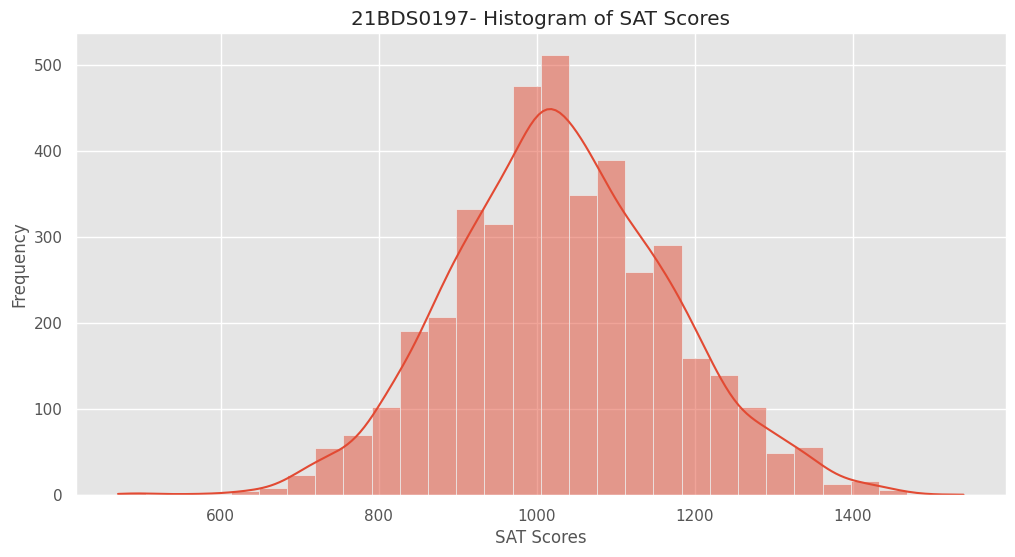

In [52]:
# Histogram for 'sat'
plt.figure(figsize=(12, 6))
sns.histplot(df['sat'], bins=30, kde=True)
plt.title("21BDS0197- Histogram of SAT Scores")
plt.xlabel("SAT Scores")
plt.ylabel("Frequency")
plt.show()

####**8.3.2 Relative Frequency Distribution**

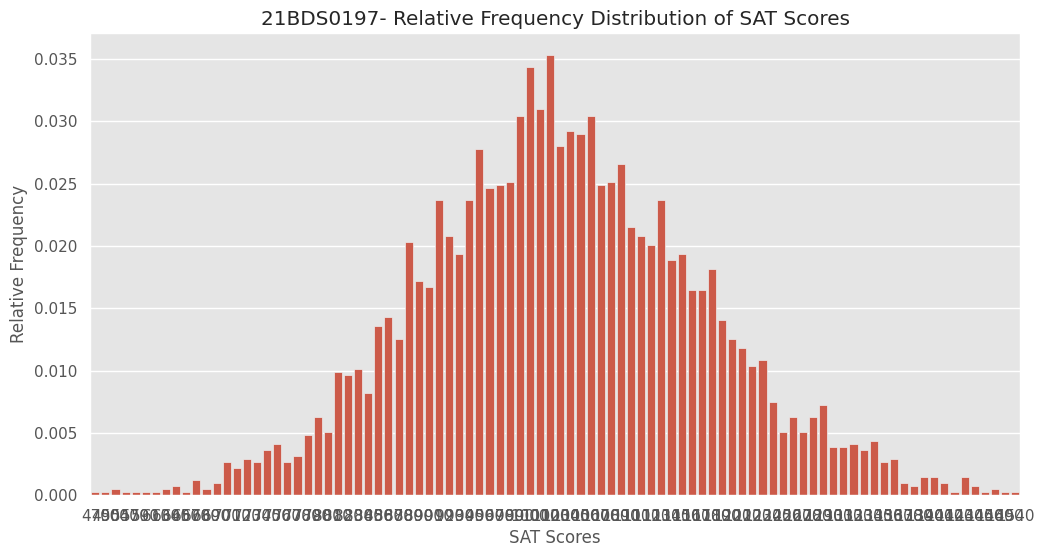

In [53]:
# Relative frequency for 'sat' (can be changed to any numerical column)
rel_freq = df['sat'].value_counts(normalize=True)

plt.figure(figsize=(12, 6))
sns.barplot(x=rel_freq.index, y=rel_freq.values)
plt.title("21BDS0197- Relative Frequency Distribution of SAT Scores")
plt.xlabel("SAT Scores")
plt.ylabel("Relative Frequency")
plt.show()

####**8.3.3 Cumulative Frequency Distribution**

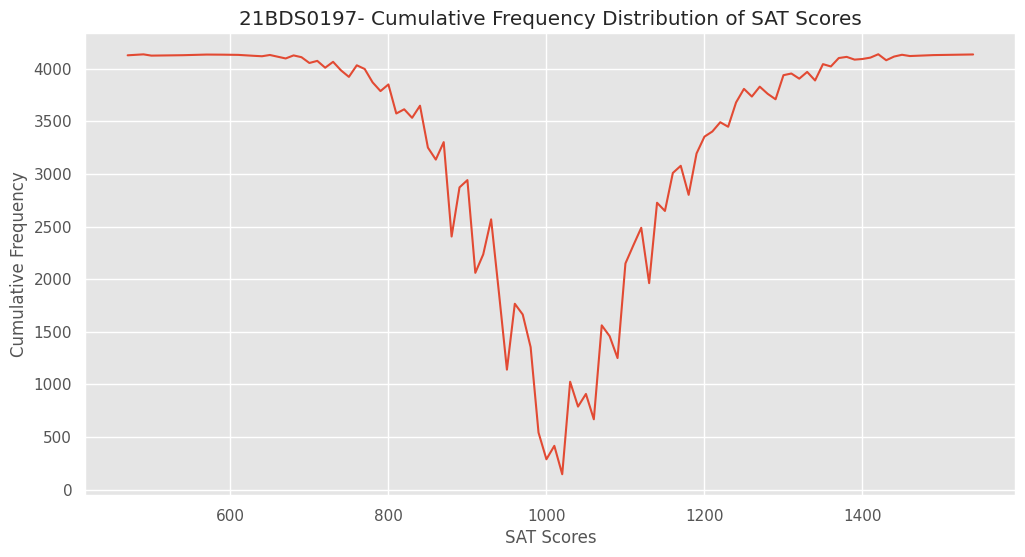

In [54]:
# Cumulative frequency for 'sat'
cumulative_freq = df['sat'].value_counts().cumsum()

plt.figure(figsize=(12, 6))
sns.lineplot(x=cumulative_freq.index, y=cumulative_freq.values)
plt.title("21BDS0197- Cumulative Frequency Distribution of SAT Scores")
plt.xlabel("SAT Scores")
plt.ylabel("Cumulative Frequency")
plt.show()

#Univariate, Bivariate, Multivariate analysis already done above.

##**Module 5 Implementation:**

##**Step 10: K-Means Clustering**

In [55]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

In [72]:
# Drop the columns as they are non-numeric
X = df.drop(['rownames','athlete','female', 'white','black' ], axis=1)

In [73]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### **10.1 Using the Elbow Method to Find the Optimal Number of Clusters**

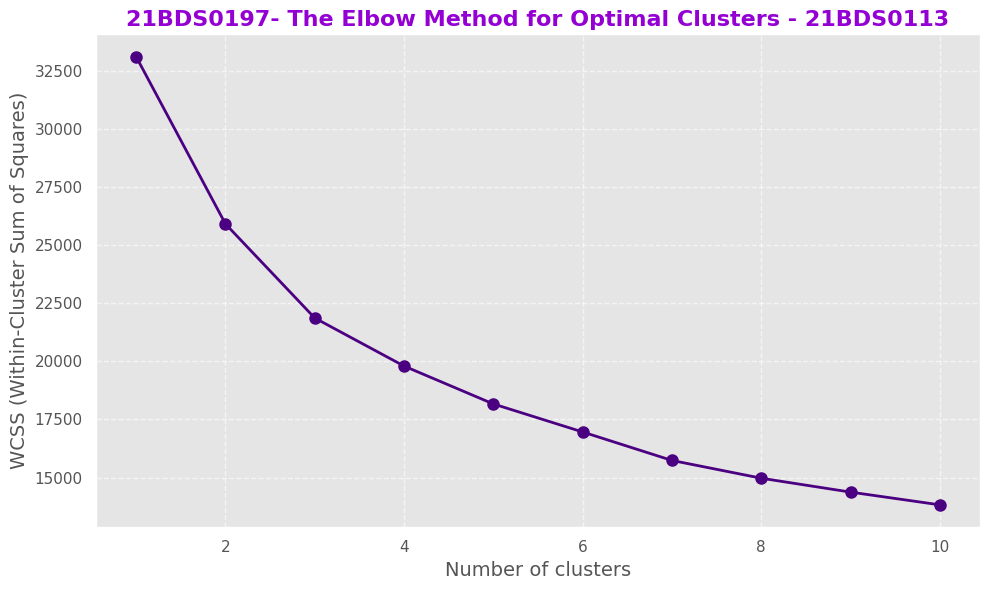

In [74]:
# Calculate WCSS (Within-Cluster Sum of Squares) for a range of cluster numbers
wcss = []
for i in range(1, 11):  # Check for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', color='indigo', linestyle='-', linewidth=2, markersize=8)
plt.title('21BDS0197- The Elbow Method for Optimal Clusters - 21BDS0113', fontsize=16, fontweight='bold', color='darkviolet')
plt.xlabel('Number of clusters', fontsize=14)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

###**10.2 Fit K-Means Clustering**

Silhouette Score for 4 Clusters: 0.3248520385790747


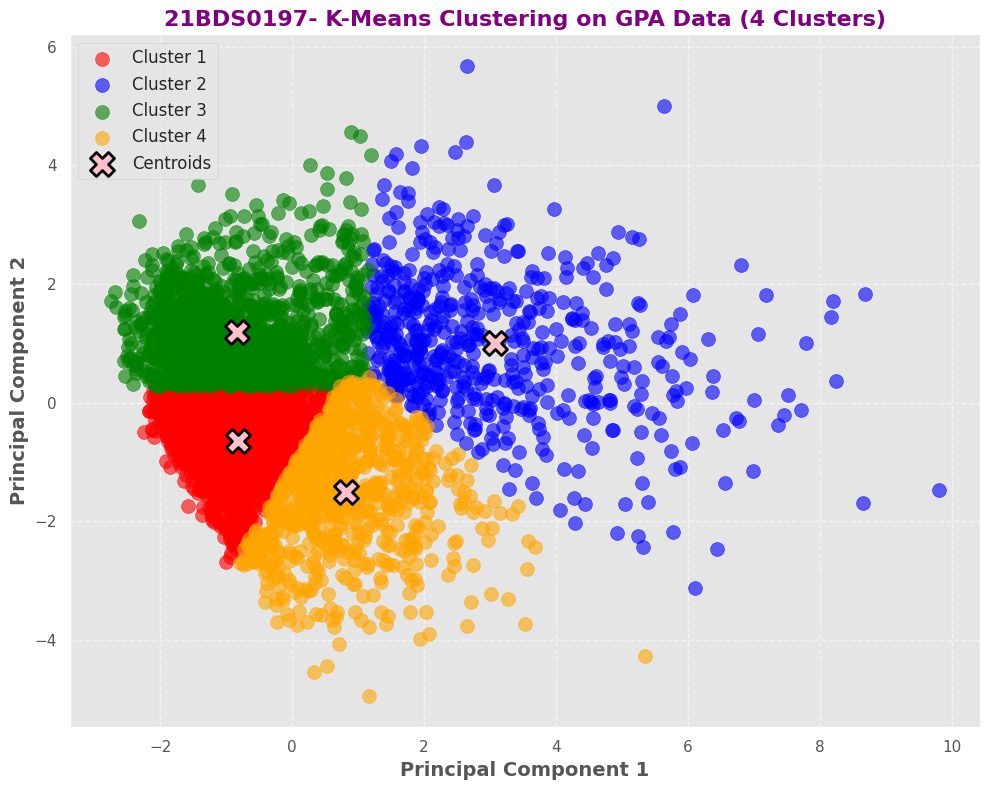

In [76]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Fit K-Means with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_pca)

# Calculate the Silhouette Score
sil_score = silhouette_score(X_pca, y_kmeans)
print(f"Silhouette Score for 4 Clusters: {sil_score}")

# Visualizing the clusters with PCA components
plt.figure(figsize=(10, 8))

# Plotting clusters
plt.scatter(X_pca[y_kmeans == 0, 0], X_pca[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1', alpha=0.6)
plt.scatter(X_pca[y_kmeans == 1, 0], X_pca[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2', alpha=0.6)
plt.scatter(X_pca[y_kmeans == 2, 0], X_pca[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3', alpha=0.6)
plt.scatter(X_pca[y_kmeans == 3, 0], X_pca[y_kmeans == 3, 1], s=100, c='orange', label='Cluster 4', alpha=0.6)

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=300, c='pink', label='Centroids', marker='X', edgecolors='black', linewidths=2)

# Adding title and labels
plt.title('21BDS0197- K-Means Clustering on GPA Data (4 Clusters)', fontsize=16, fontweight='bold', color='purple')
plt.xlabel('Principal Component 1', fontsize=14, fontweight='bold')
plt.ylabel('Principal Component 2', fontsize=14, fontweight='bold')
plt.legend(loc='upper left', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

###**10.3 Calculate Different Distances**

In [77]:
# Calculate the Euclidean, Manhattan, and Cosine distances
euclidean_distances = cdist(X_pca, kmeans.cluster_centers_, 'euclidean')
manhattan_distances = cdist(X_pca, kmeans.cluster_centers_, 'cityblock')
cosine_distances = cdist(X_pca, kmeans.cluster_centers_, 'cosine')

# Print the first 5 distances for each type
print('Euclidean Distances (first 5 points):\n', euclidean_distances[:5])
print('Manhattan Distances (first 5 points):\n', manhattan_distances[:5])
print('Cosine Distances (first 5 points):\n', cosine_distances[:5])

Euclidean Distances (first 5 points):
 [[1.5053801  4.94659404 3.33886123 1.68541224]
 [8.57994587 4.74832208 7.50598932 8.09474981]
 [2.12857758 4.69869451 3.87783964 1.33254869]
 [4.96752543 1.53380549 5.11596348 3.57629934]
 [1.06510949 3.23334808 2.03974972 1.11711237]]
Manhattan Distances (first 5 points):
 [[ 1.58756787  6.96439196  3.42803162  2.20200613]
 [12.10651225  6.56055842 10.27770727 11.32294425]
 [ 2.81178825  6.62091054  4.652252    1.85852471]
 [ 5.46479459  2.16760968  6.25505749  4.68122659]
 [ 1.15675307  4.38920077  2.80526364  1.53512638]]
Cosine Distances (first 5 points):
 [[0.16114146 1.60485863 1.58570495 0.32450506]
 [1.99793935 0.08280065 0.88590452 1.22820212]
 [0.39766739 1.29630873 1.82742814 0.11318883]
 [1.77052625 0.05910576 1.59799234 0.49869382]
 [0.74120665 0.91627634 1.97768842 0.00458058]]


##**Step 11: Hierarchical Clustering**

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import linkage, dendrogram

In [88]:
# For clustering, let's use some of the features as an example:
dataset = df[['sat', 'tothrs', 'colgpa', 'hsrank']]

In [91]:
# Using only subset of dataset as it is very large
dataset=dataset.sample(n=200, random_state=42)

In [92]:
# Statistical summary of the selected features
print("Statistical Summary:")
print(dataset.describe())

Statistical Summary:
               sat      tothrs     colgpa      hsrank
count   200.000000  200.000000  200.00000  200.000000
mean   1049.700000   49.230000    2.64885   51.470000
std     138.972938   35.785192    0.70237   69.110858
min     610.000000   11.000000    0.00000    1.000000
25%     950.000000   16.000000    2.22000   12.000000
50%    1050.000000   44.000000    2.73500   28.000000
75%    1140.000000   80.000000    3.21000   67.000000
max    1540.000000  133.000000    4.00000  634.000000


###**11.1 Euclidean Distance Matrix and Dendogram**

Sample of Euclidean Distance Matrix:
 [225.00888871 141.23033102 195.28031775 227.40716809 241.02850952
  91.7086479  161.7394723  411.926412   160.09900062 164.1844478 ]


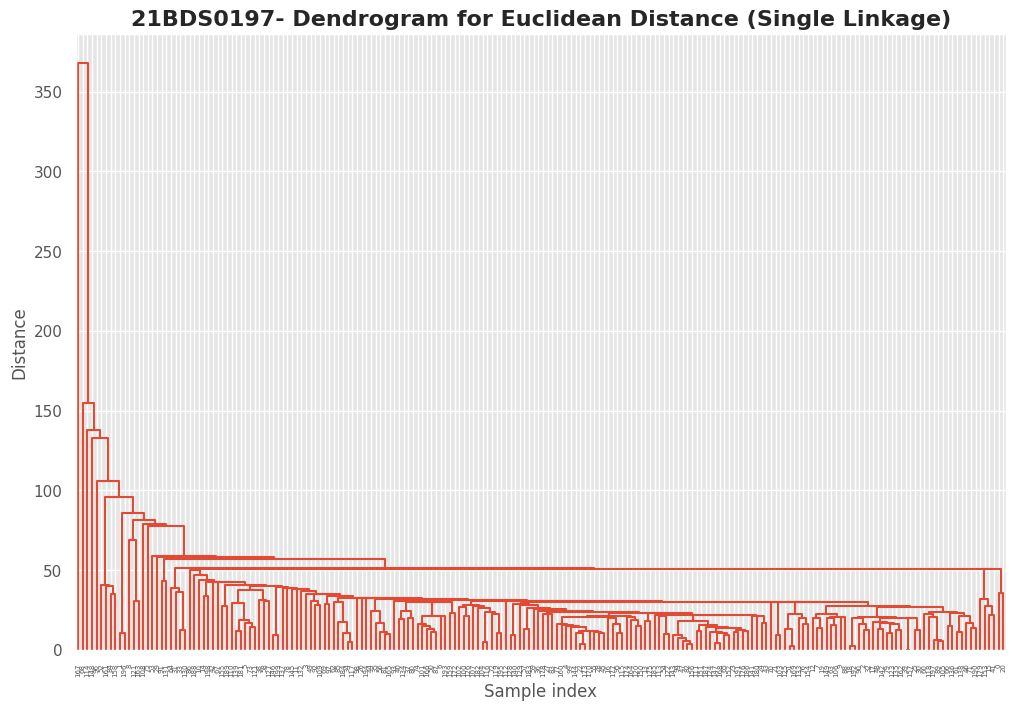

In [93]:
# Compute the Euclidean distance matrix using pdist (pairwise distances)
euclidean_distances = pdist(dataset, metric='euclidean')
print("Sample of Euclidean Distance Matrix:\n", euclidean_distances[:10])

# Dendrogram for Euclidean distance
linked = linkage(euclidean_distances, method='single')

plt.figure(figsize=(12, 8))
plt.title('21BDS0197- Dendrogram for Euclidean Distance (Single Linkage)', fontsize=16, fontweight='bold')
plt.xlabel('Sample index', fontsize=12)
plt.ylabel('Distance', fontsize=12)

dendrogram(linked, color_threshold=0)

plt.gcf().set_facecolor('white')

plt.show()

###**11.2 Manhattan Distance and Dendogram**

Sample of Manhattan Distance Matrix:
 [287.00000012 164.08000004 279.55000007 340.01000011 366.32000005
 116.68999994 254.63       541.16999996 237.30000007 254.73000014]


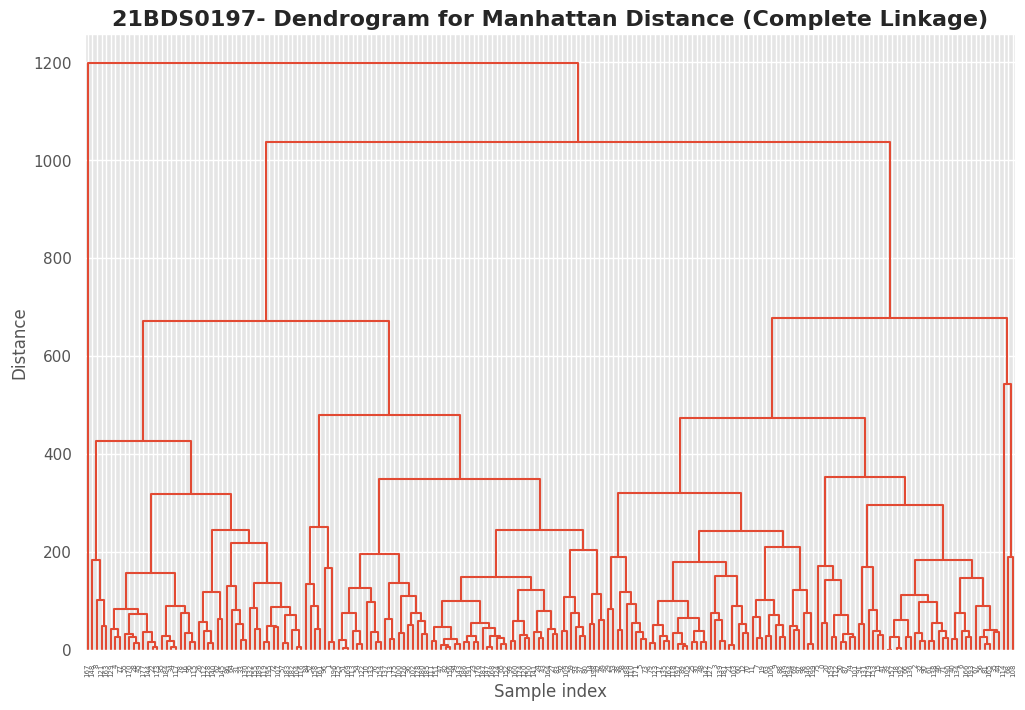

In [94]:
# 4. Compute the Manhattan distance matrix using pdist
manhattan_distances = pdist(dataset, metric='cityblock')
print("Sample of Manhattan Distance Matrix:\n", manhattan_distances[:10])

# 5. Dendrogram for Manhattan distance
linked_manhattan = linkage(manhattan_distances, method='complete')

plt.figure(figsize=(12, 8))
plt.title('21BDS0197- Dendrogram for Manhattan Distance (Complete Linkage)', fontsize=16, fontweight='bold')
plt.xlabel('Sample index', fontsize=12)  # X-axis label
plt.ylabel('Distance', fontsize=12)  # Y-axis label

# Customize the appearance of the dendrogram
dendrogram(linked_manhattan, color_threshold=0)

plt.gcf().set_facecolor('white')

# Show the plot
plt.show()

##**Module 6 Implementation:**

##**Step 12: Principal Component Analysis**

In [95]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [96]:
# Drop the columns as non-numeric
X = df.drop(['rownames','athlete','female', 'white','black' ], axis=1)

In [97]:
# Standardize the data (PCA works best with standardized data)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

###**12.1 Perform PCA on numeric columns**

In [98]:
# Perform PCA
pca = PCA()
pca.fit(data_scaled)

PCA()

In [99]:
# Display the explained variance ratio(eigenvalues) for each component
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio (Eigenvalues):\n", explained_variance_ratio)

# Component loadings (coefficients of the components)
component_loadings = pca.components_
print("\nComponent Loadings (coefficients):\n", component_loadings)

Explained Variance Ratio (Eigenvalues):
 [0.33173498 0.22982074 0.12676909 0.12187121 0.09840354 0.06737329
 0.01854526 0.00548189]

Component Loadings (coefficients):
 [[ 5.57602781e-01 -1.43405696e-01 -9.75712725e-02 -2.57817479e-01
  -4.40883905e-02  4.92377106e-01  3.03056482e-01  5.06262487e-01]
 [-8.04230938e-02  4.63965684e-01  1.01150361e-01  4.83769686e-01
  -6.82823569e-02  4.03238481e-01 -4.76911751e-01  3.73222311e-01]
 [ 4.50460213e-02 -1.59968616e-01  6.99653168e-01  3.92803421e-02
   6.89068102e-01  5.16935581e-02  1.67342005e-02  5.96346421e-02]
 [ 6.42903905e-03  2.41305488e-01 -6.53183051e-01  2.44544707e-02
   7.17045131e-01  3.57058528e-03  1.74506106e-02 -3.63568198e-03]
 [ 2.92142202e-01  6.35623880e-01  1.90334027e-01  2.48503362e-01
  -6.58152735e-02 -1.90426010e-01  5.90584649e-01 -1.52546092e-01]
 [ 1.36249581e-01 -5.25513960e-01 -1.66763438e-01  7.97206697e-01
  -8.24234431e-03 -3.59764920e-02  2.01085175e-01 -1.11837172e-02]
 [ 7.47424286e-01  1.04256996e-02

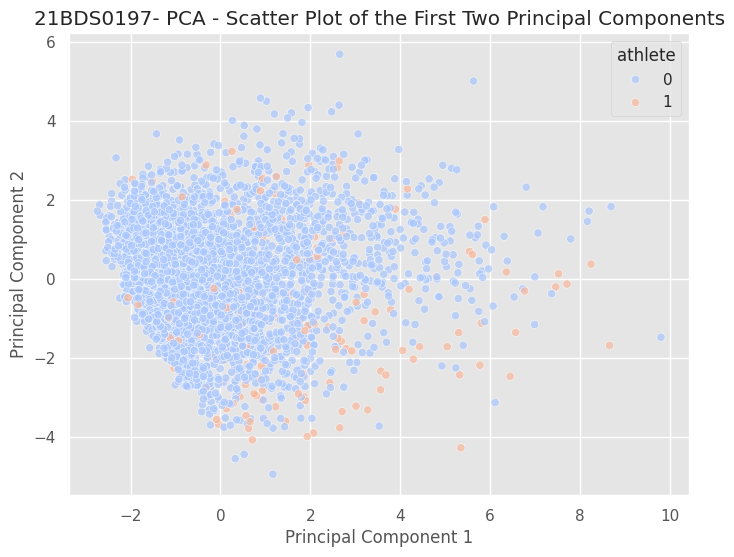

In [102]:
# Visualize PCA Components using scatter plot
# Get the first two principal components
pc_df = pd.DataFrame(pca.transform(data_scaled), columns=[f"PC{i+1}" for i in range(pca.n_components_)])

# Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pc_df['PC1'], y=pc_df['PC2'], palette='coolwarm', hue=df['athlete'],alpha=0.7)

# Add titles and labels
plt.title('21BDS0197- PCA - Scatter Plot of the First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Show grid and plot
plt.grid(True)
plt.show()

##**Module 7 Implementation:**

In [103]:
#Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [104]:
data=df.drop('rownames', axis=1)

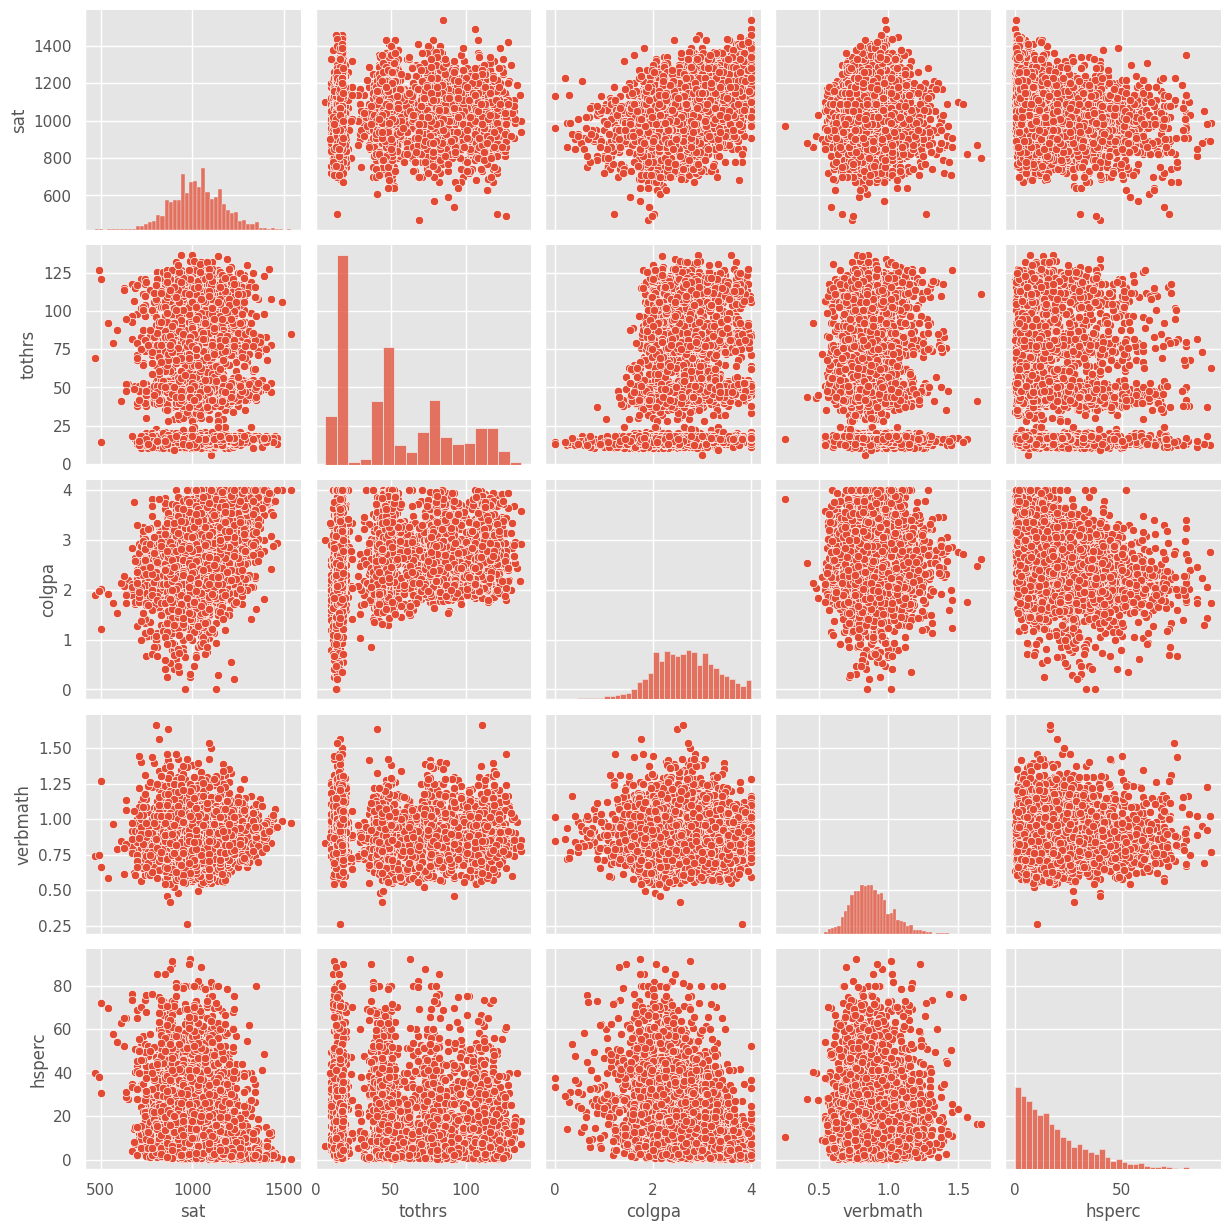

In [106]:
#Identify Relationships Between Features
sns.pairplot(df[['sat', 'tothrs', 'colgpa', 'verbmath', 'hsperc']])
plt.show()

In [129]:
# Split the Dataset into Training and Test Sets
# Independent (X) and Dependent (Y) Variables
X = df[['sat']]  # Independent variable (Example: SAT scores)
y = df['colgpa']  # Dependent variable (Example: College GPA)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)


###**13.1 Simple Linear Regression**

In [130]:
# Fit the model
reg1 = LinearRegression()
reg1.fit(X_train, y_train)

LinearRegression()

In [131]:
# Check residuals
print(f"Coefficient: {reg1.coef_[0]}")
print(f"Intercept: {reg1.intercept_}")

Coefficient: 0.001917791721160935
Intercept: 0.6740885812558817


In [132]:
# Predict test results
y_pred = reg1.predict(X_test)

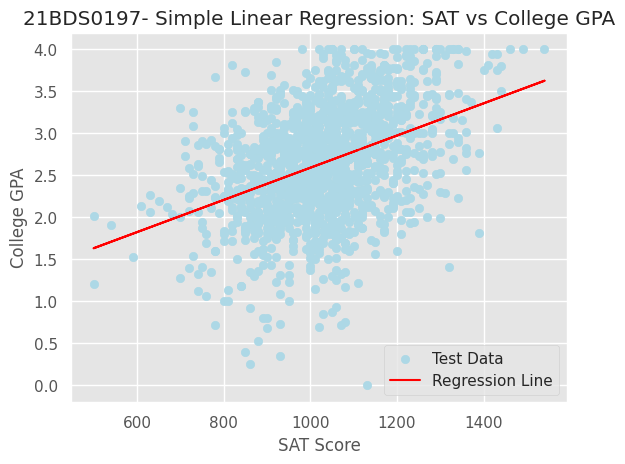

In [113]:
# Visualize results
plt.scatter(X_test, y_test, color='lightblue', label='Test Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel("SAT Score")
plt.ylabel("College GPA")
plt.title("21BDS0197- Simple Linear Regression: SAT vs College GPA")
plt.legend()
plt.show()

###**13.2 Multiple Linear Regression with Log Transformation**

In [114]:
# Apply log transformation to 'hsizesq'
df['log_hsizesq'] = np.log(df['hsizesq'])

In [115]:
# Independent variables and dependent variable
X_multi = df[['sat', 'tothrs', 'log_hsizesq']]
y_multi = df['colgpa']

In [116]:
# Split dataset
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=1/3, random_state=42)

In [117]:
# Fit model
reg2 = LinearRegression()
reg2.fit(X_train_multi, y_train_multi)

LinearRegression()

In [118]:
# Predictions and residuals
y_pred_multi = reg2.predict(X_test_multi)
residuals = y_test_multi - y_pred_multi

In [119]:
# Create DataFrame for predicted and residuals
pred_residuals = pd.DataFrame({
    'Predicted': y_pred_multi,
    'Residuals': residuals
})
print(pred_residuals.head())

      Predicted  Residuals
4049   2.773231  -0.853231
2668   2.280249   0.639751
2781   2.715573  -0.715573
238    3.012847   0.457153
3635   2.341488   0.588512


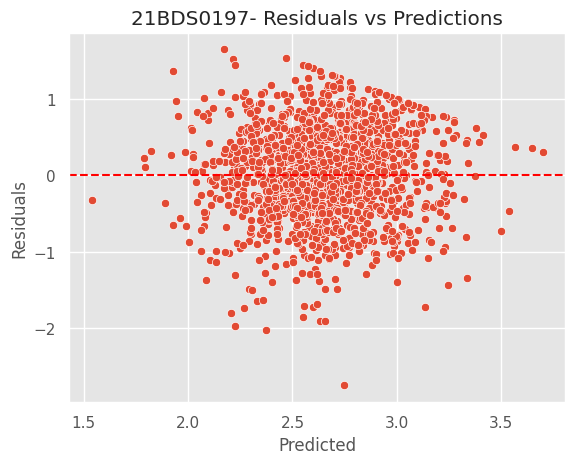

In [121]:
# Visualize Residuals vs. Predictions
sns.scatterplot(x=pred_residuals['Predicted'], y=pred_residuals['Residuals'])
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("21BDS0197- Residuals vs Predictions")
plt.show()

###**13.3 Logistic Regression**

In [135]:
# Creating a binary target variable: 1 if colgpa > 3.0, else 0
df['high_gpa'] = (df['colgpa'] > 3.0).astype(int)

In [136]:
# Independent variables (use all except the target column)
X = df.drop(columns=['colgpa', 'high_gpa'])

# Dependent variable (target variable)
y = df['high_gpa']

In [137]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [142]:
# Fit the Logistic Regression Model
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [143]:
# Predict the test set results
y_pred = log_reg.predict(X_test)

In [144]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

cr = classification_report(y_test, y_pred)
print("Classification Report:")
print(cr)

Confusion Matrix:
[[783  68]
 [198 193]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       851
           1       0.74      0.49      0.59       391

    accuracy                           0.79      1242
   macro avg       0.77      0.71      0.72      1242
weighted avg       0.78      0.79      0.77      1242

